\newpage

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [2]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [3]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform `sg`, `al`, `su` into Categorical variables and convert those binary variables to numerical (0 and 1). Since there are missing values in those cat variables, we will convert them after replacing those missing values.

In [4]:
# Binary trans
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
mapping = {'normal': 1, 'present': 1, 'abnormal': 0, 'notpresent': 0, 'yes':1,'no':0,'good':1,'poor':0,'ckd':1,'notckd':0}

for column in columns_bin:
    df[column] = df[column].map(mapping).astype(float)
    
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0


**After part 5&6, missing values and outliers are handled, all numerical values will be scaled, while binary/categorical variables will be transformed to categorical type.** If variables are scaled too early, it may influence overview and EDA.

### **3. Dataset Overview**

In [5]:
# Summary
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,398.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

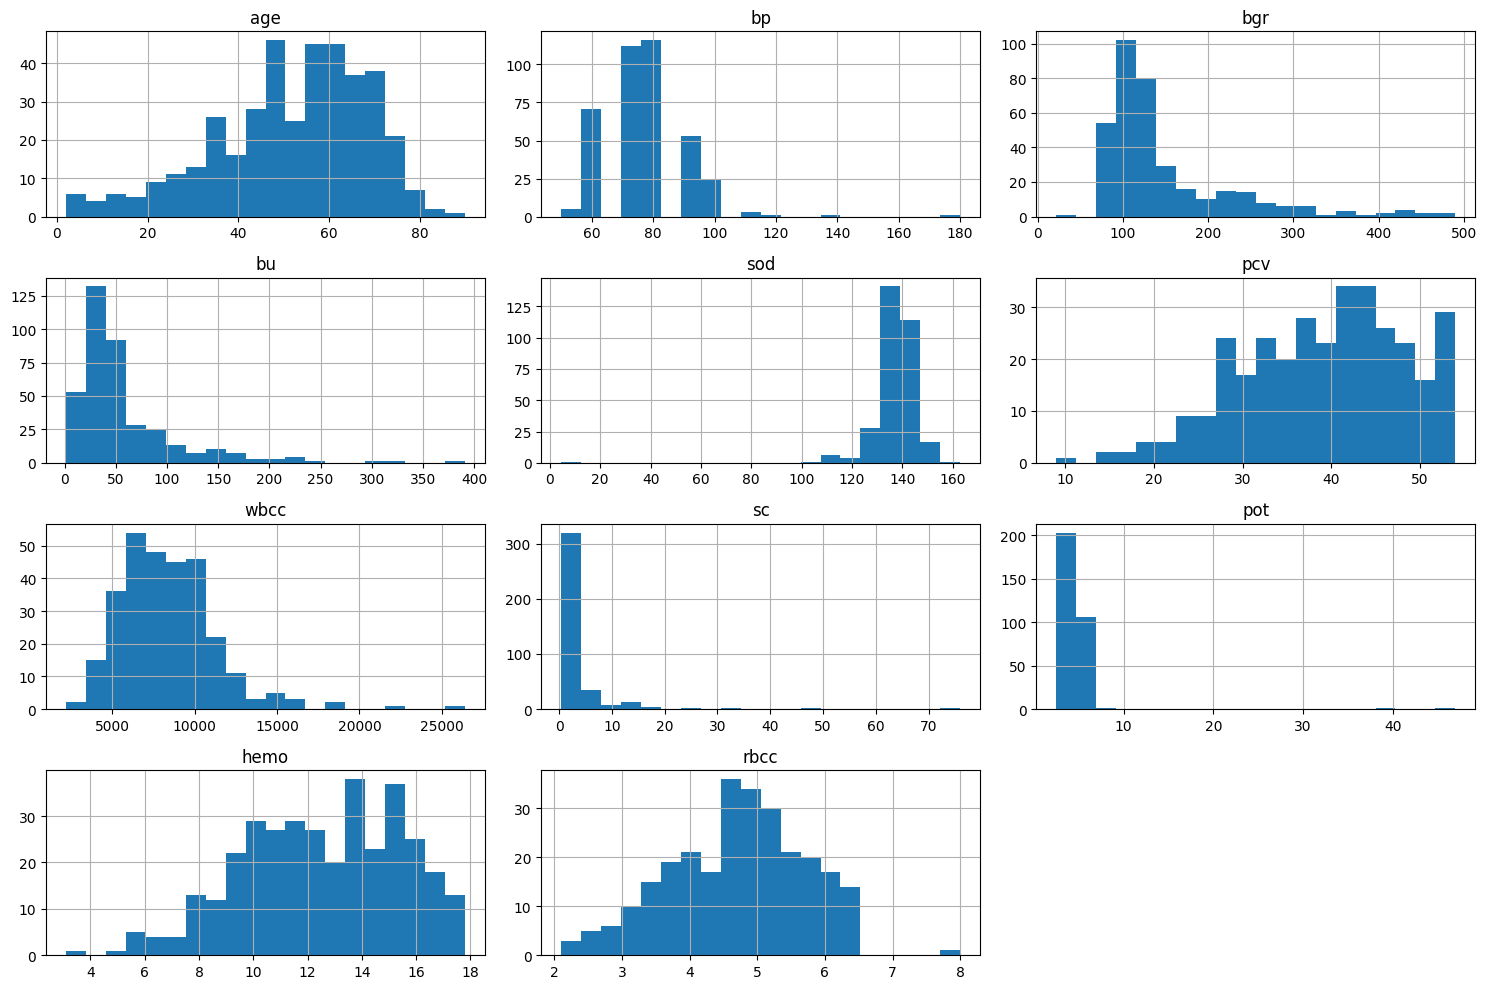

In [7]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']
df[num_col].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


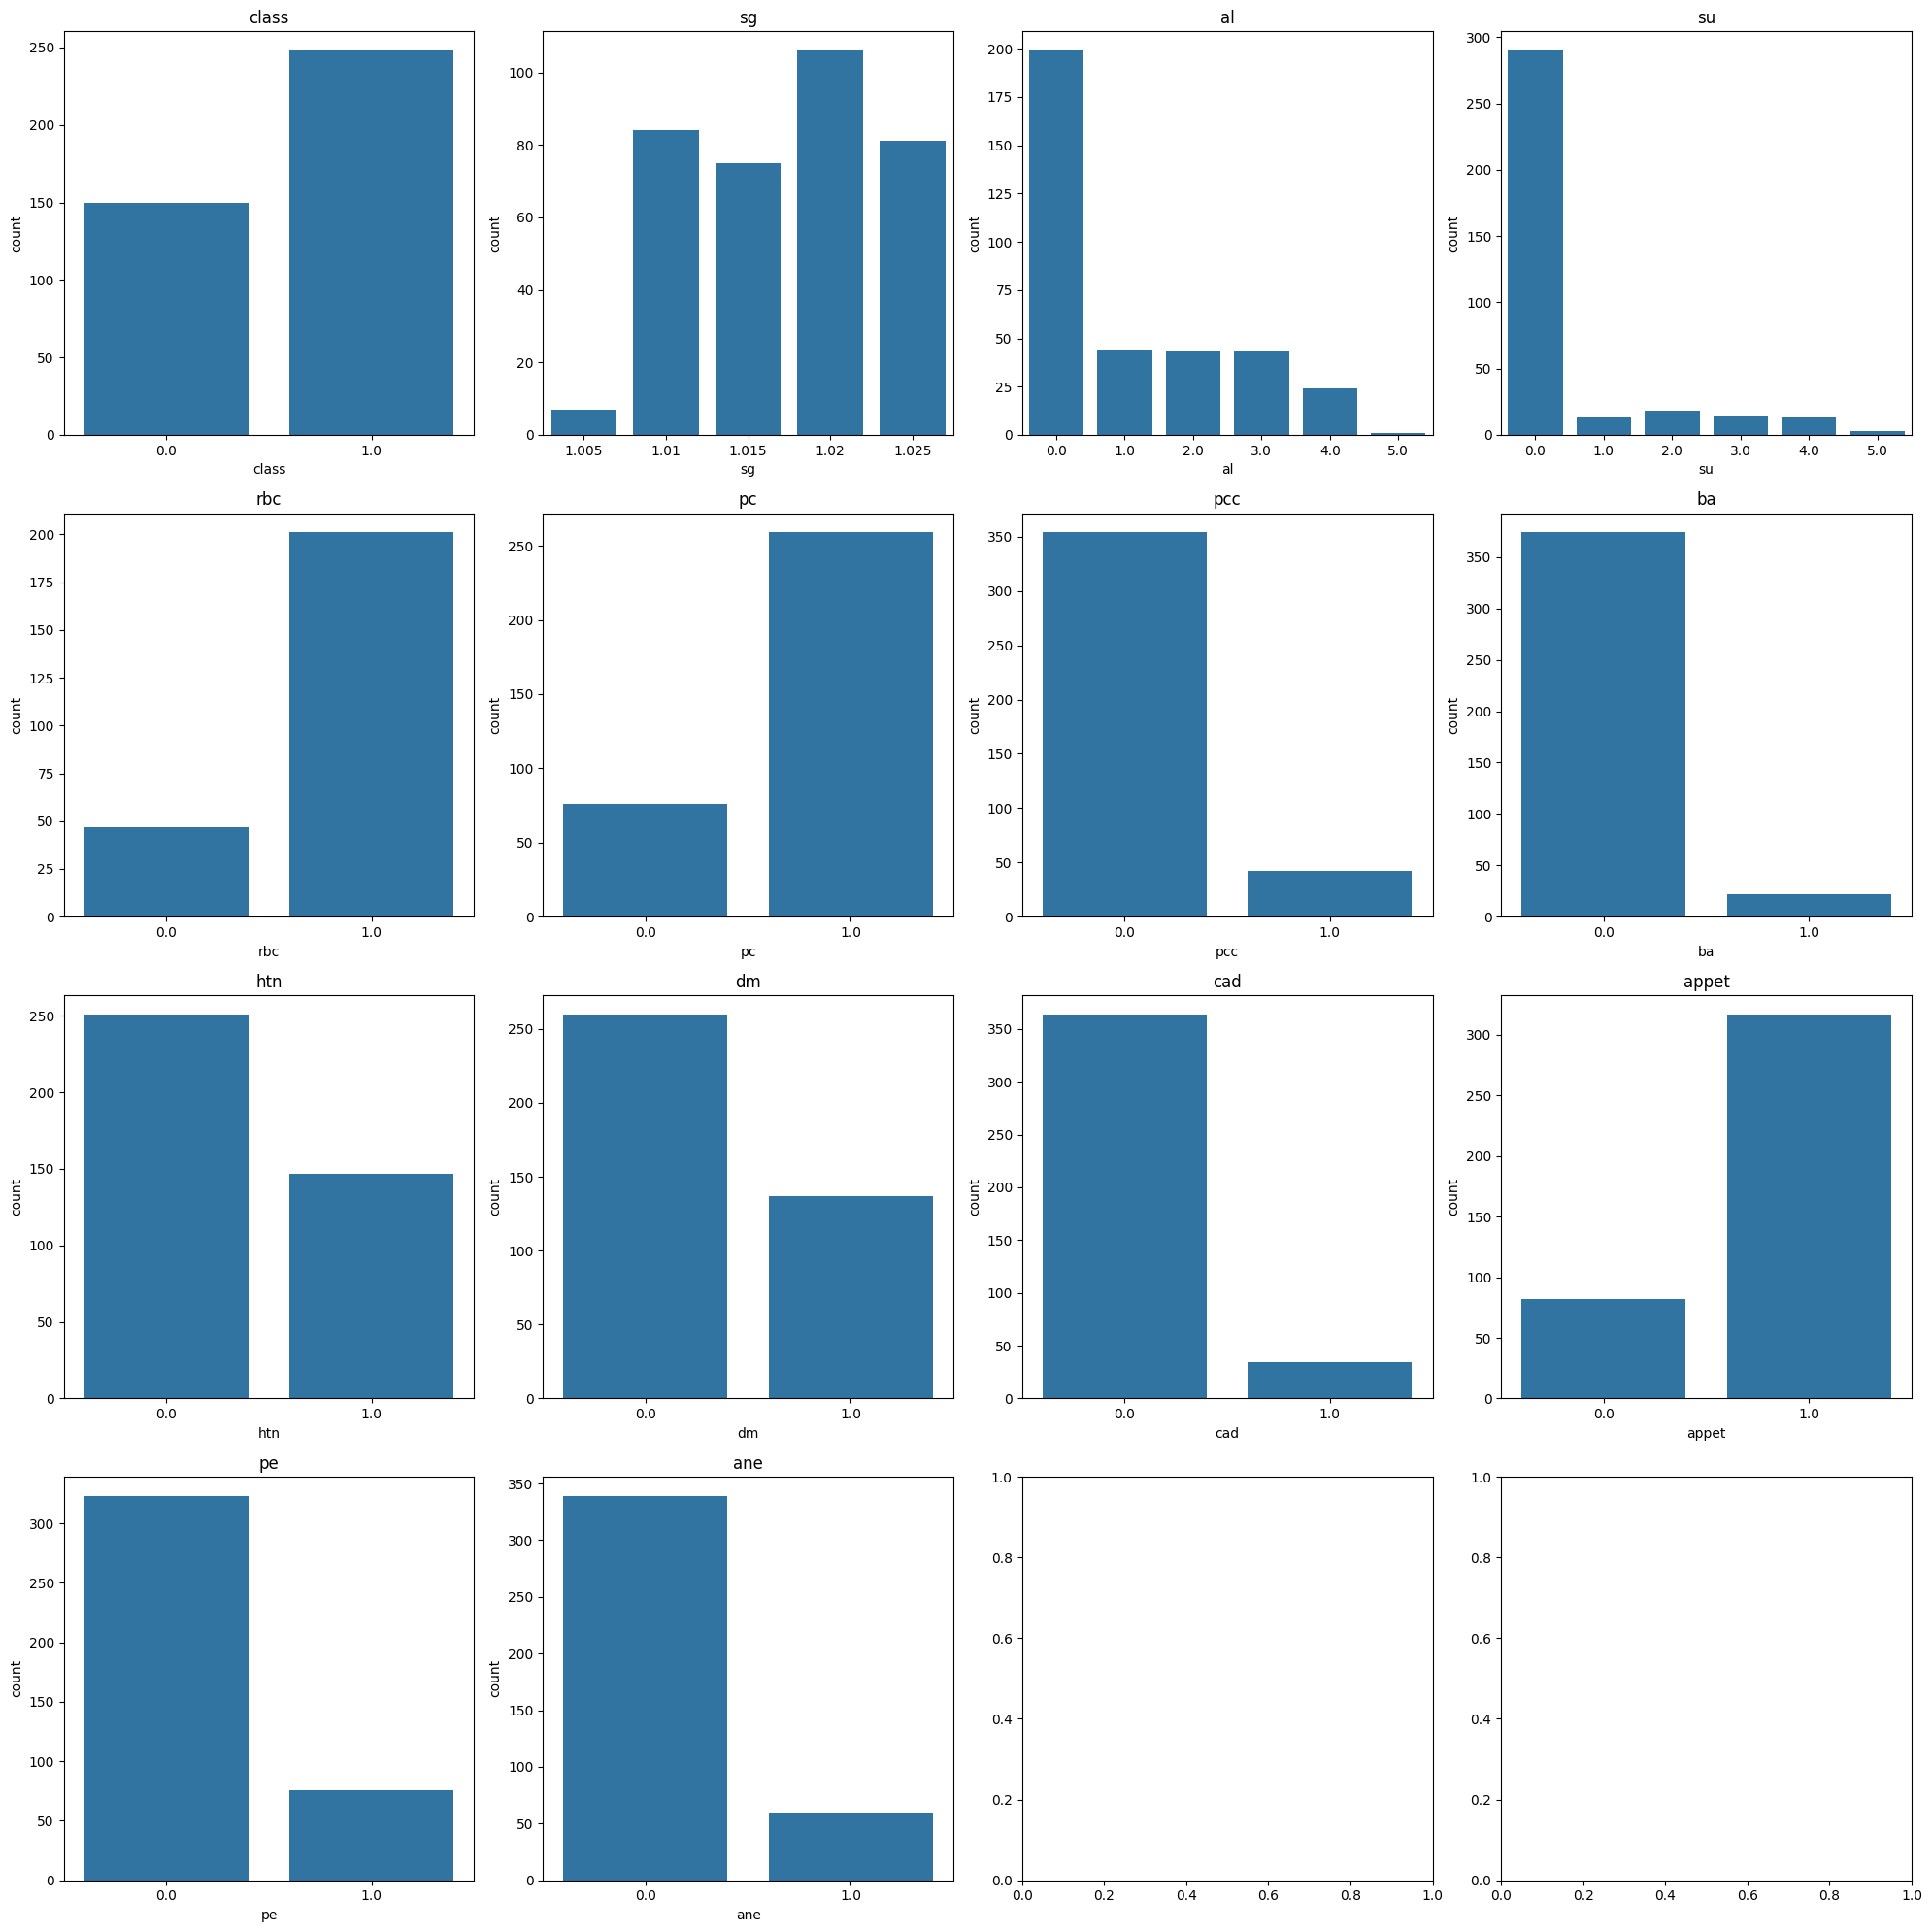

In [8]:
columns_cat = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

rows = 4
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i, column in enumerate(columns_cat):
    row = i // cols
    col = i % cols
    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

There are 400 observations and 25 variables in the dataset. `sg`, `al`, `su` are Categorical variables now. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc`,`sc`,`pot`,`hemo`,and `rbcc` variables are all of type float. The rest of the variables are object(in this case Binary).

According to the data summary, the mean of observations under the `age` variable was about 51.48. The maximum and minimum age are 90 and 2 respectively, respectively. Also, the mean of `bp` (blood pressure) is about 76.47. But there may be some missing values and outliers in the dataset based on the data summary.

Also, we can find that most of them have the skewness problem by looking at the distribution of observations under each variable. So, this implies that there exist a lot of missing values and outliers in our dataset. And, depending on the distribution, we might consider replacing the missing values with a median.

### **4. Association Between Variables**

Create a heatmap to find potential relationship between variables.

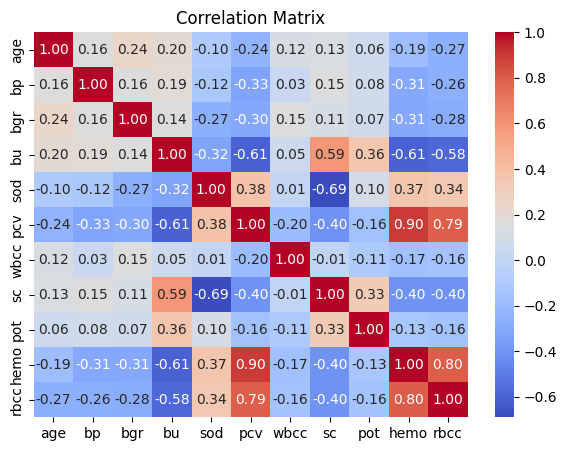

In [9]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Variables `sc` (serum creatinine) and `hemo` (hemoglobin) have a strong negative correlation (-0.61), suggesting that as serum creatinine levels increase, hemoglobin levels tend to decrease.

`pcv` (packed cell volume) and `hemo` (hemoglobin) show a strong positive correlation (0.90). This indicates that when the Packed cell volume rises, the amount of Hemoglbin will also increase. This may be because both are related to the blood's ability to carry oxygen.

`sod` (sodium) appears to have a moderate negative correlation with `bu` (blood urea) and `sc` (serum creatinine), which might suggest that higher levels of urea and creatinine in the blood are associated with lower sodium levels.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

df_cleaned = df[num_col].dropna()
vals = [VIF(df_cleaned, i)
        for i in range(1, df_cleaned.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=df_cleaned.columns[1:])
vif

,vif
bp,33.314145
bgr,5.228453
bu,10.308152
sod,154.643905
pcv,106.157383
wbcc,10.830481
sc,7.157653
pot,3.696926
hemo,110.751640
rbcc,63.753595


From variance inflation factor, `sod`, `pcv` and `hemo` have extremely large value, this indicates that they have severe multicollinearity issues. To solve this problem, Ridge Regression/ PCA or LASSO will be applied in the next part. 

### **5. Missing Value Analysis and Handling**

In [11]:
## Check the missing vlaue
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      2
dtype: int64

In [12]:
print(df.shape)

## Drop the missing values
df_dropna = df.dropna()
print(df_dropna.shape)


(400, 25)
(158, 25)


Based on the distribution of observed values for each variable in the dataset overview, we need to replace in those missing values in different ways. If the distribution is approximately normal, we choose to replace it with mean. If there is a skewness, we need to replace it in with median.

So, for `age`, `pcv`, `rbcc` variables. We choose to replace their missing values with mean. For the missing observations in the remaining variables, we replace them with median

In [13]:
#| warning: false

median_col = ['age', 'pcv', 'rbcc', 'bp', 'bgr', 'bu', 'sod', 'wbcc', 'sc', 'pot', 'hemo']
columns_bin = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
columns_cat = ['sg', 'al', 'su']

for column in median_col:
    df[column].fillna(df[column].median(), inplace=True)

for column in columns_bin + columns_cat:
    mode_value = df[column].mode()[0] 
    df[column].fillna(mode_value, inplace=True)

/var/folders/hn/ppjqqvp92p98s_jyr599kvk40000gn/T/ipykernel_15250/634754541.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/var/folders/hn/ppjqqvp92p98s_jyr599kvk40000gn/T/ipykernel_15250/634754541.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Now, we can convert those three numerical variables into categorical variables.

In [14]:
columns_cat = [ 'class','sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])


df.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

In [15]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,36.0,8000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [16]:
# Check Missing Values again
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### **6. Outlier Analysis**

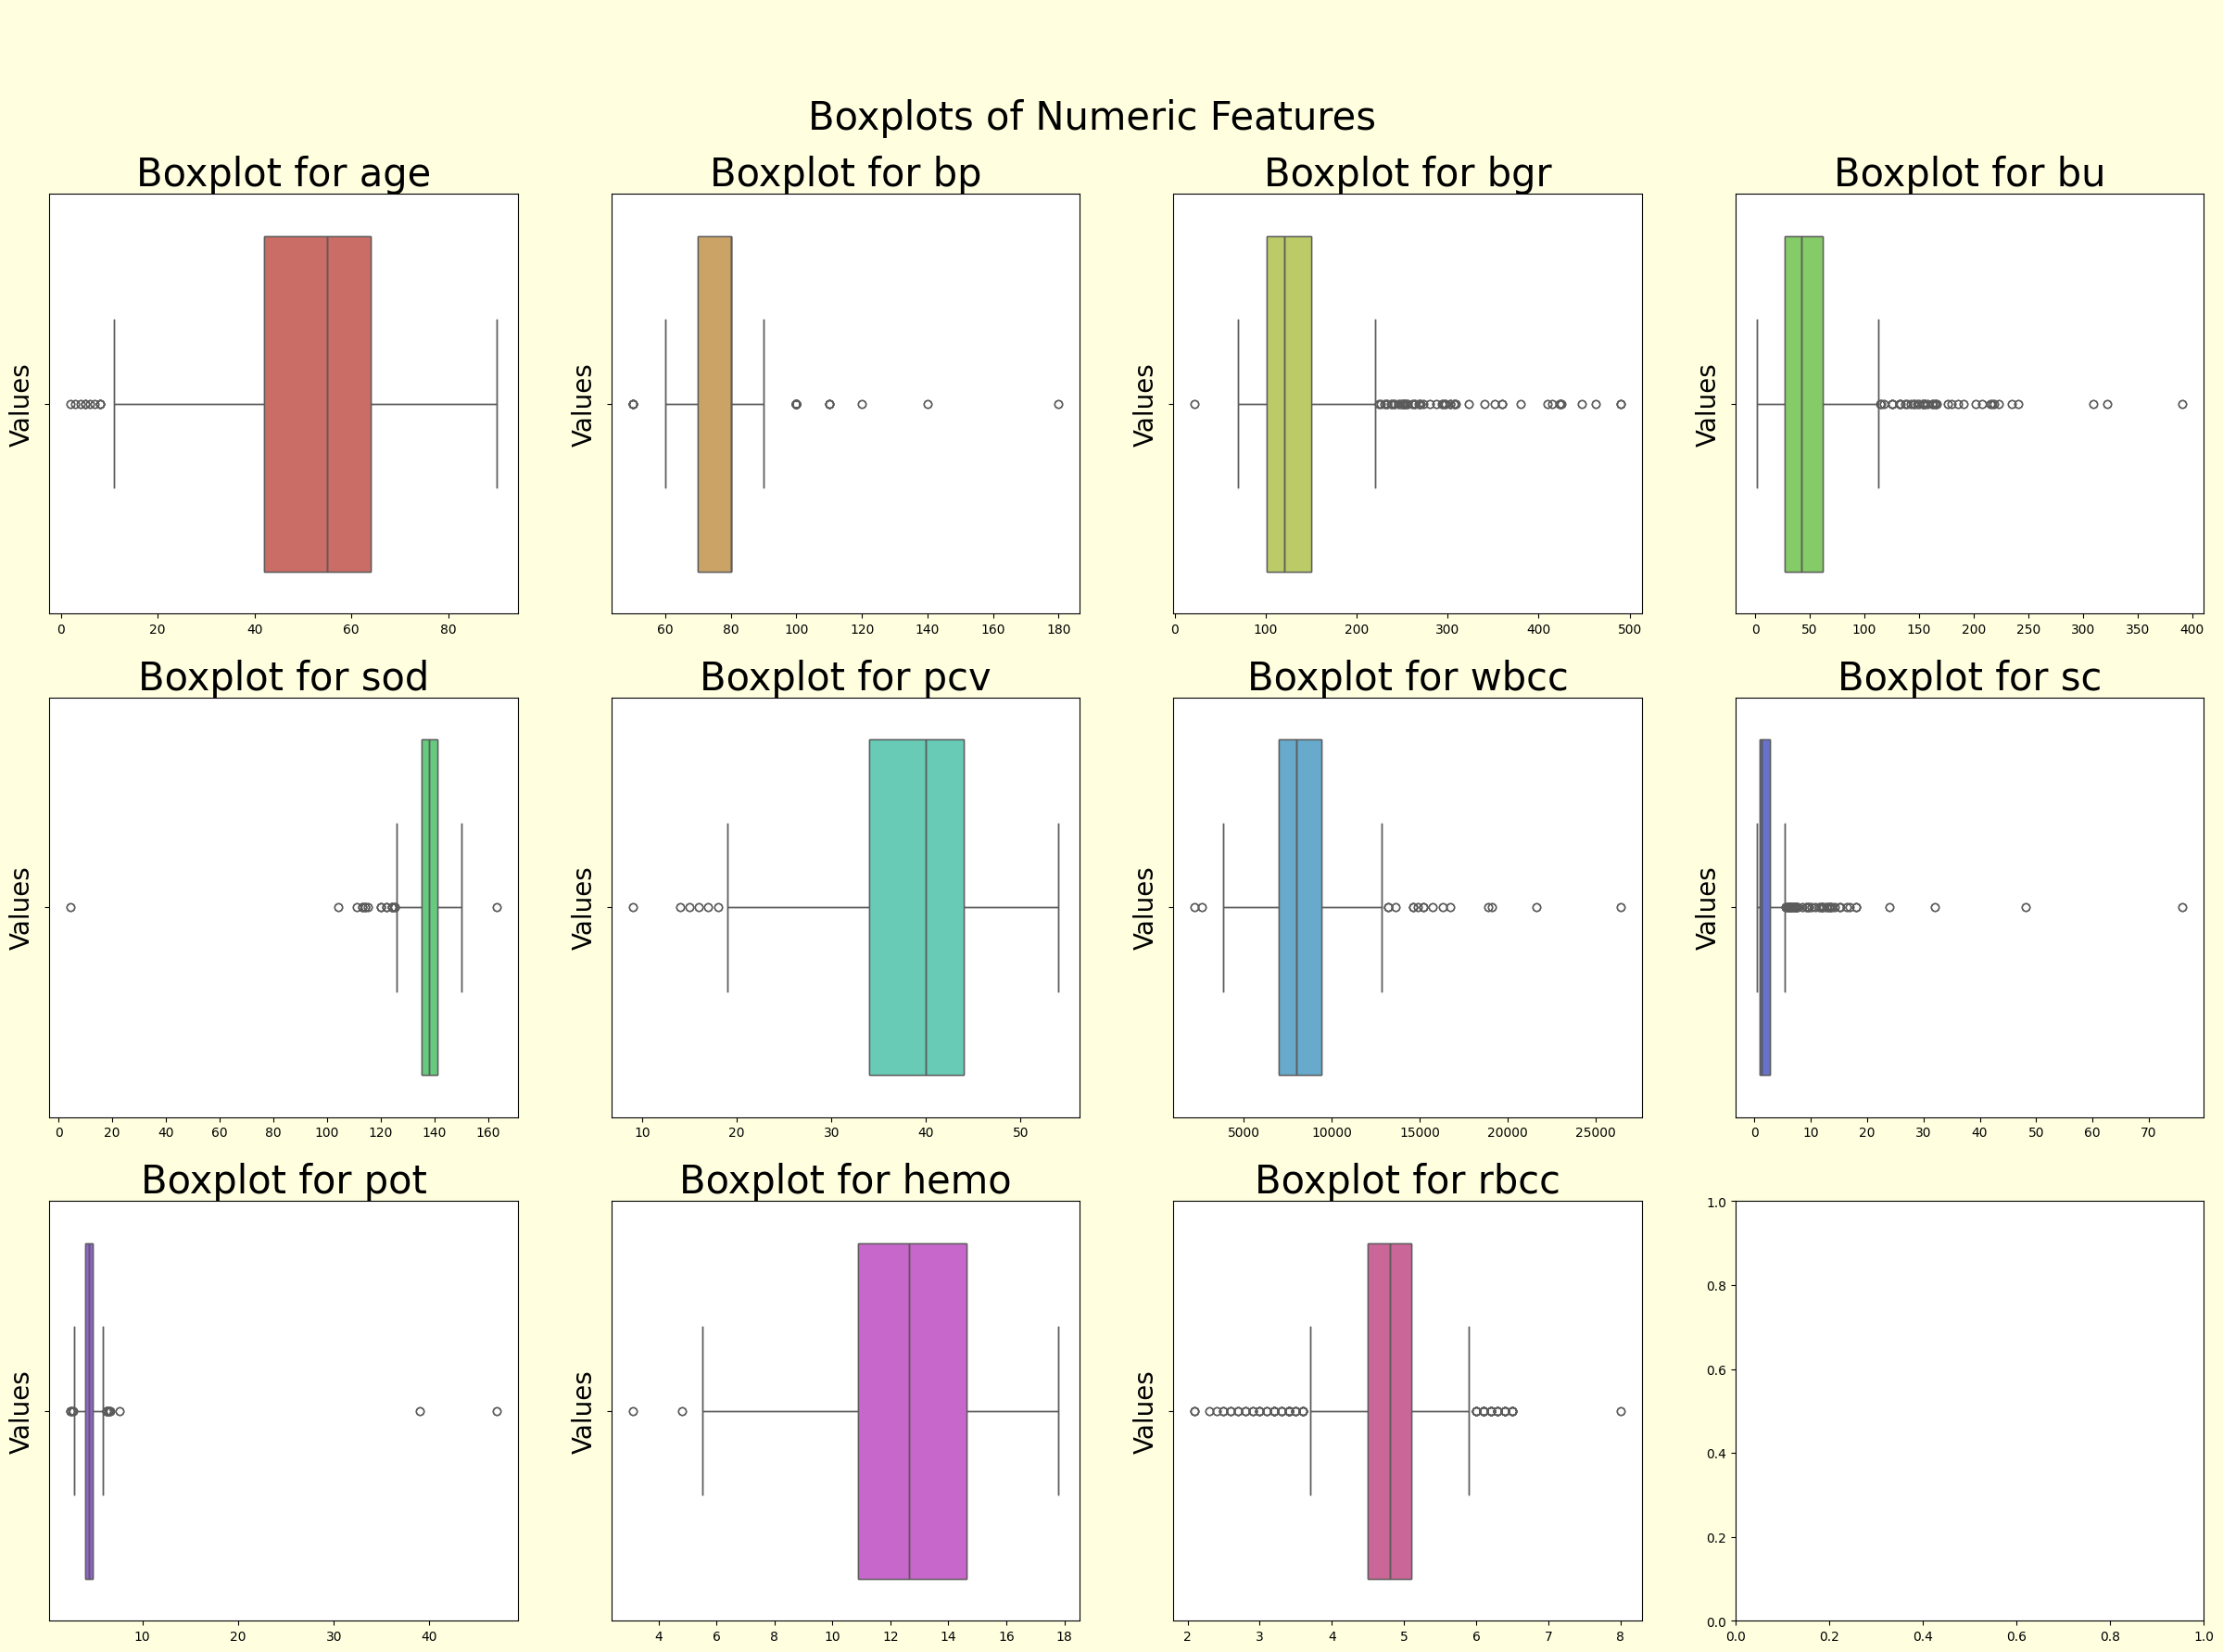

In [17]:
n_rows, n_cols = (3, 4)

colors = sns.color_palette("hls", len(df[num_col].columns))

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')
figure.suptitle('\n\nBoxplots of Numeric Features', fontsize=30)

for index, column in enumerate(df[num_col].columns):
    
    i, j = index // n_cols, index % n_cols
    
    collabel = column
    
    sns.boxplot(x=df[column], ax=axes[i, j])

    sns.boxplot(x=df[column], ax=axes[i, j], color=colors[index])
    
    axes[i, j].set_title(f'Boxplot for {collabel}', fontsize=30)
    
    axes[i, j].set_xlabel(None)
    
    axes[i, j].set_ylabel("Values", fontsize=20)

plt.show()

In [18]:
from sklearn.preprocessing import scale

In [19]:
for column in df[num_col].columns:
    # Q3
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    # Max val
    max_val = df[column].max()

    # outlier threshold
    threshold_max = Q3 + 1.5 * (Q3 - df[column].quantile(0.25))
    threshold_min = Q1 - 1.5 * (Q3 - df[column].quantile(0.25))
    # replace outlier with Q3 + 1.5IQR or Q1 - 1.5IQR
    df[column] = np.where(
        df[column] > threshold_max, 
        threshold_max, 
        df[column]
        )
    
    df[column] = np.where(
        df[column] < threshold_min, 
        threshold_min, 
        df[column]
        )


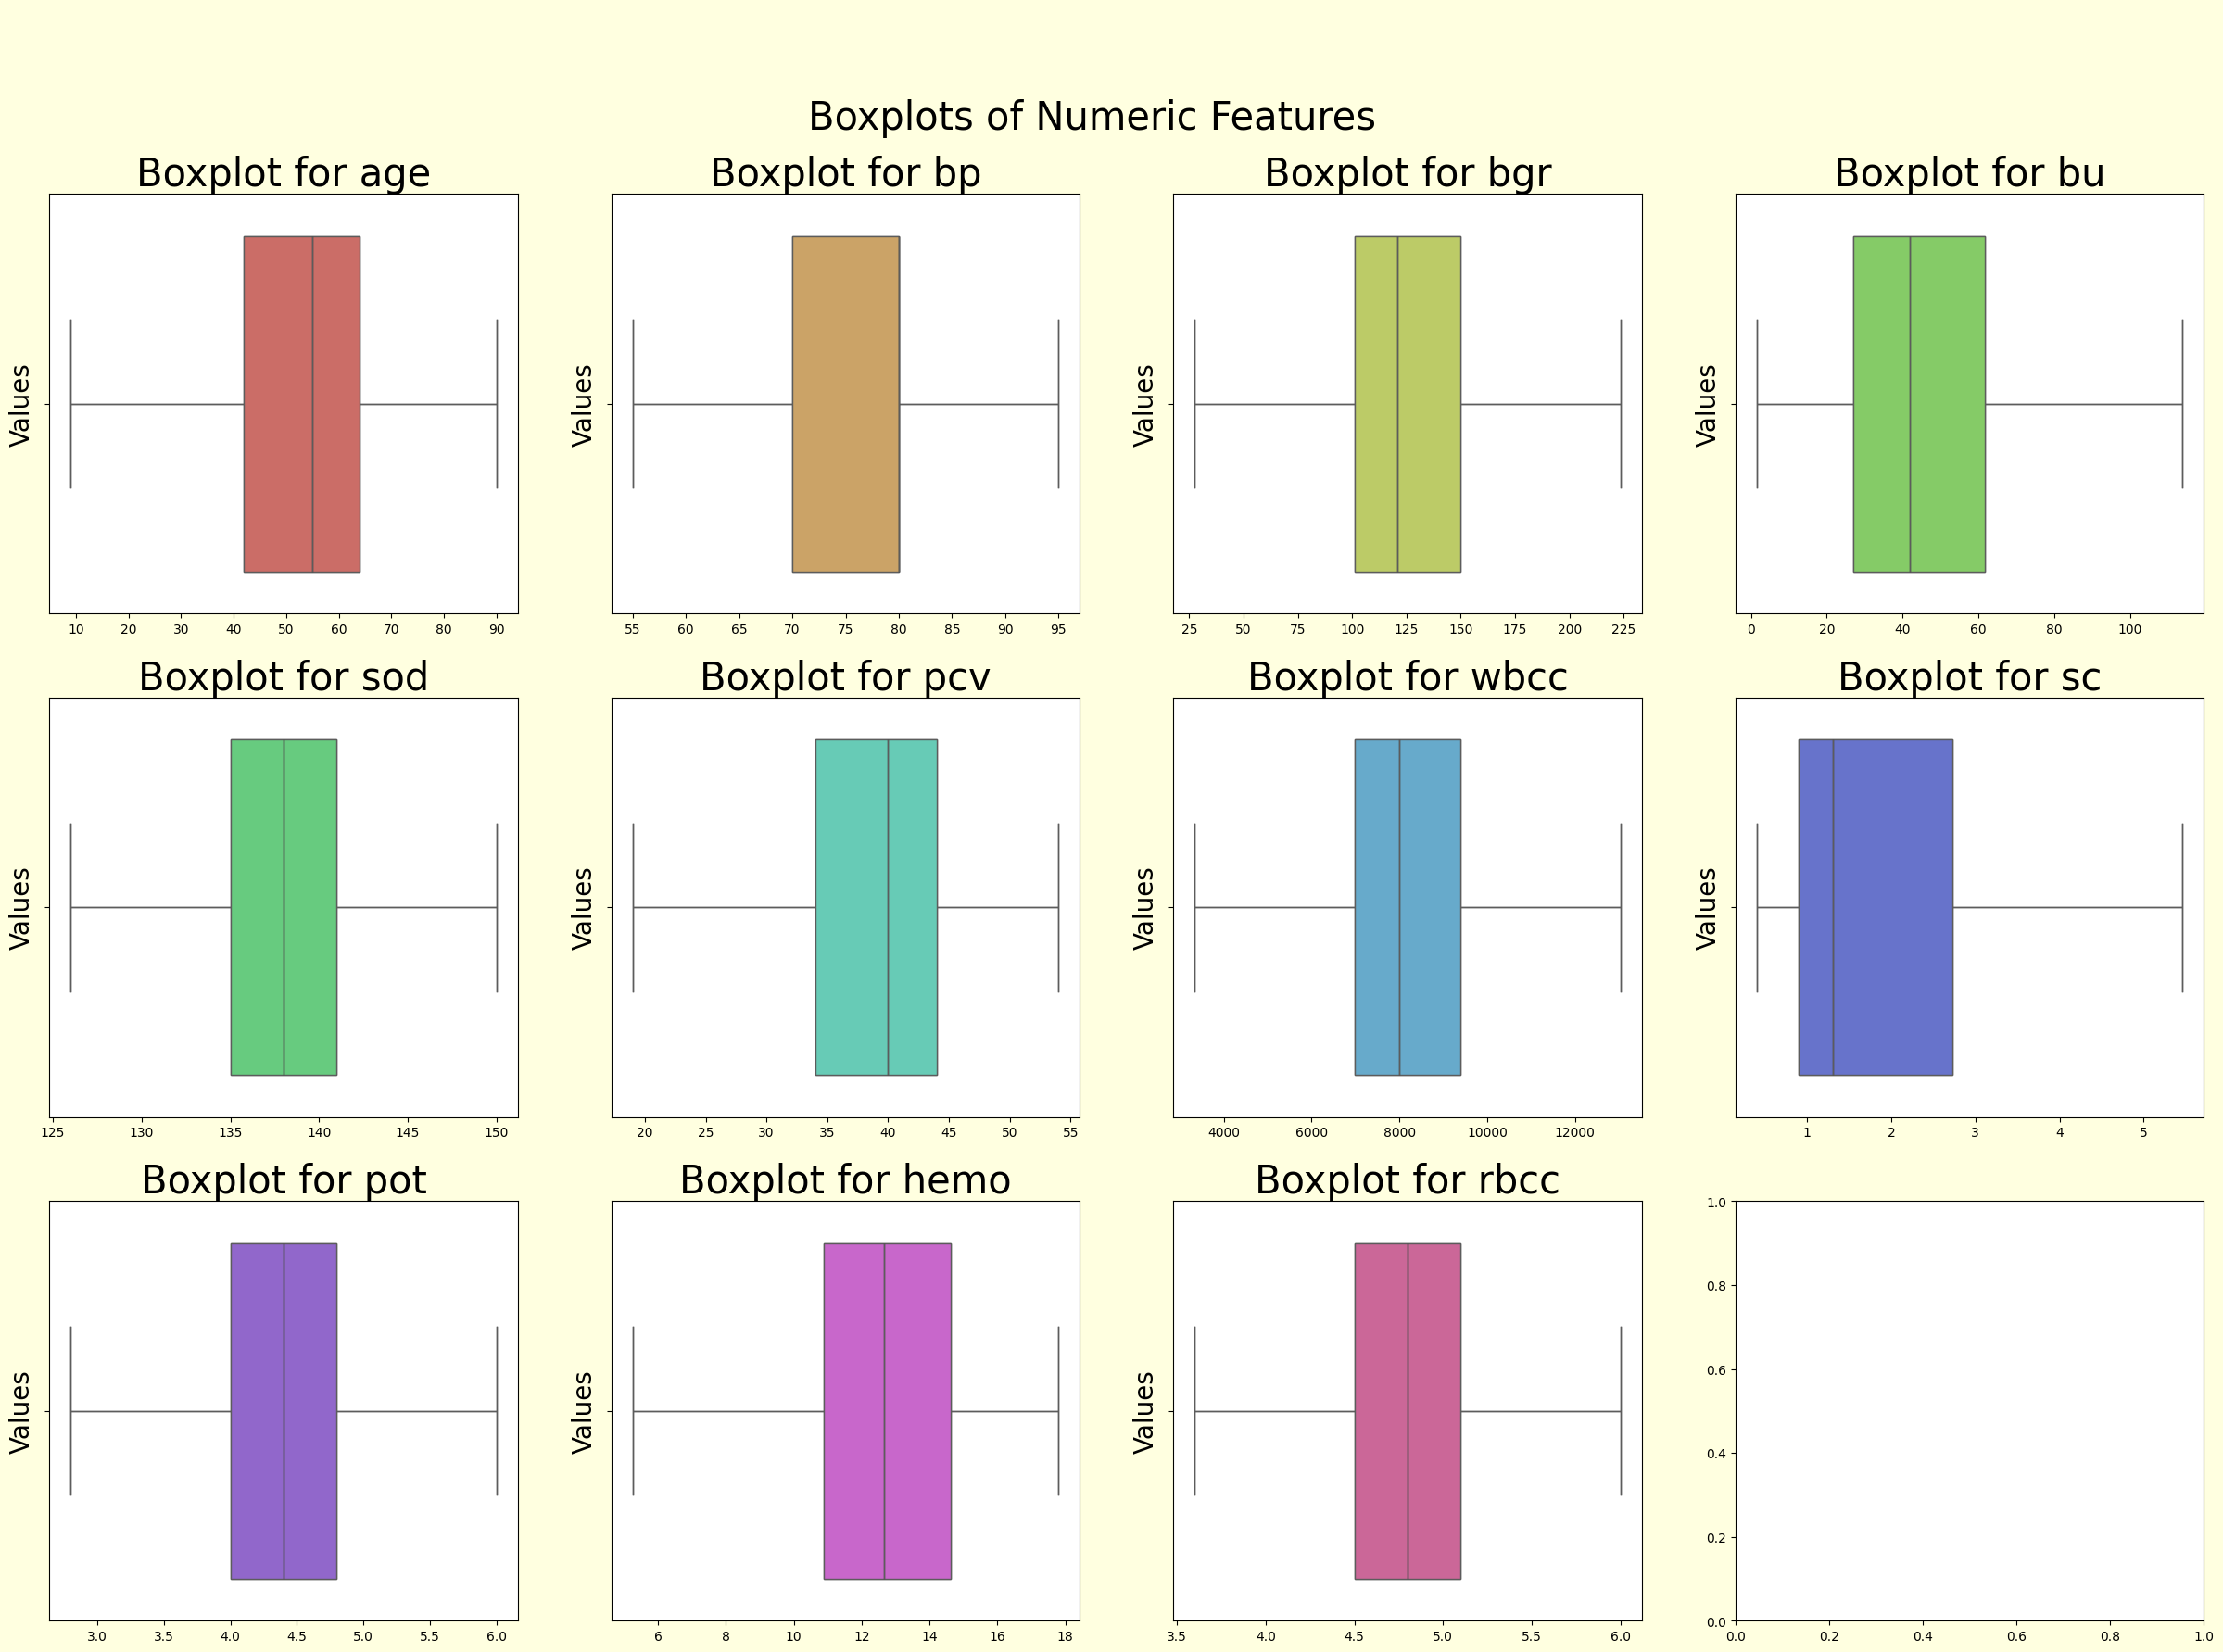

In [20]:
n_rows, n_cols = (3, 4)

colors = sns.color_palette("hls", len(df[num_col].columns))

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')
figure.suptitle('\n\nBoxplots of Numeric Features', fontsize=30)

for index, column in enumerate(df[num_col].columns):
    
    i, j = index // n_cols, index % n_cols
    
    collabel = column
    
    sns.boxplot(x=df[column], ax=axes[i, j])

    sns.boxplot(x=df[column], ax=axes[i, j], color=colors[index])
    
    axes[i, j].set_title(f'Boxplot for {collabel}', fontsize=30)
    
    axes[i, j].set_xlabel(None)
    
    axes[i, j].set_ylabel("Values", fontsize=20)

plt.show()

We ended up replacing all the outliers in this step. We let outliers to be transfered to (Q3 + 1.5IQR) or (Q1 - 1.5IQR).

### **7. Sub-group Analysis**

In subgroup analysis, we need the unsupervised clustering technique K-Means to explore potential sub-groups.

In [21]:
# Check the mean
df[num_col].mean()

age       51.647500
bp        75.825000
bgr      134.011250
bu        50.277687
sod      138.217500
pcv       39.145000
wbcc    8169.093750
sc         2.071406
pot        4.382750
hemo      12.549000
rbcc       4.769750
dtype: float64

In [22]:
# Check the variance
df[num_col].var()

age     2.807652e+02
bp      1.203703e+02
bgr     2.124512e+03
bu      9.171178e+02
sod     2.780972e+01
pcv     6.371326e+01
wbcc    4.123827e+06
sc      2.659236e+00
pot     4.035864e-01
hemo    7.272142e+00
rbcc    4.553984e-01
dtype: float64

Variables with large variance have a greater impact on the algorithm in unsupervised learning. Therefore, we must scale all the variables before performing further algorithms.

In [23]:
# Scale the numerical data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(
    df[num_col]
)
print(df[num_col].head(3))

        age        bp       bgr        bu       sod       pcv      wbcc  \
0 -0.217955  0.381013 -0.282640 -0.472051 -0.041296  0.609001 -0.181983   
1 -2.548388 -1.900504 -0.282640 -1.067169 -0.041296 -0.143626 -1.069478   
2  0.618610  0.381013  1.943938  0.090005 -0.041296 -1.021691 -0.329898   

         sc       pot      hemo      rbcc  
0 -0.535039  0.027187  1.058546  0.638364  
1 -0.780638  0.027187 -0.463740  0.044882  
2 -0.166642  0.027187 -1.094932  0.044882  


K-mean clustering can be used to perform sub-group analysis.

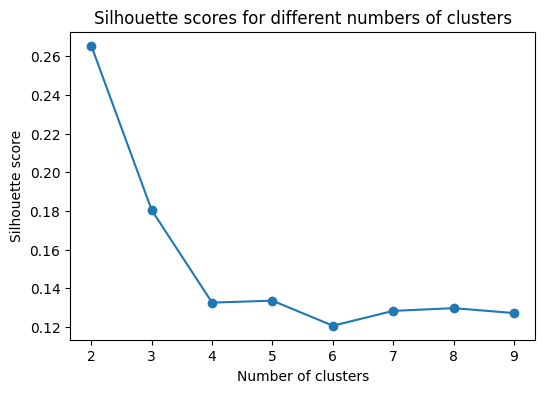

In [24]:
# Perform K—Mean

columns_to_drop = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] 
df_test = df.drop(columns=columns_to_drop)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []

K_range = range(2, 10)
for K in K_range:
    km = KMeans(n_clusters=K, n_init=20,random_state=1)
    clusters = km.fit_predict(df_test)
    silhouette_scores.append(silhouette_score(df_test, clusters))

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

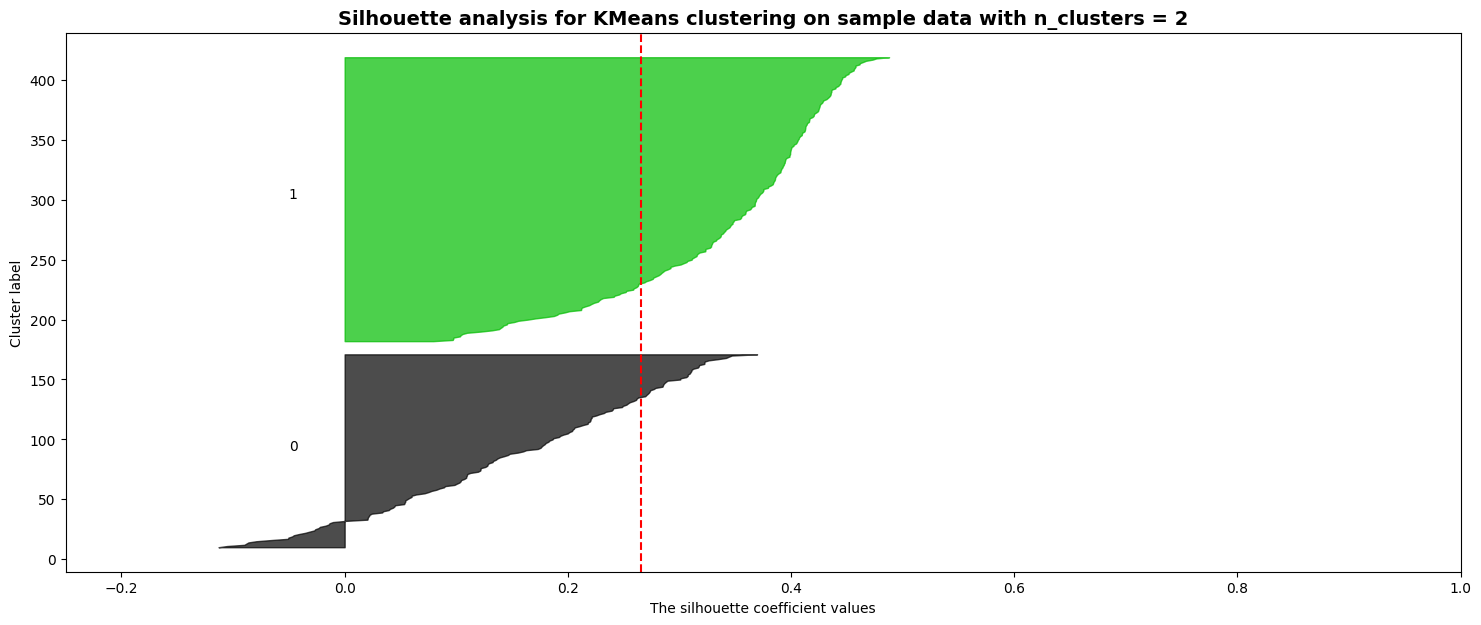

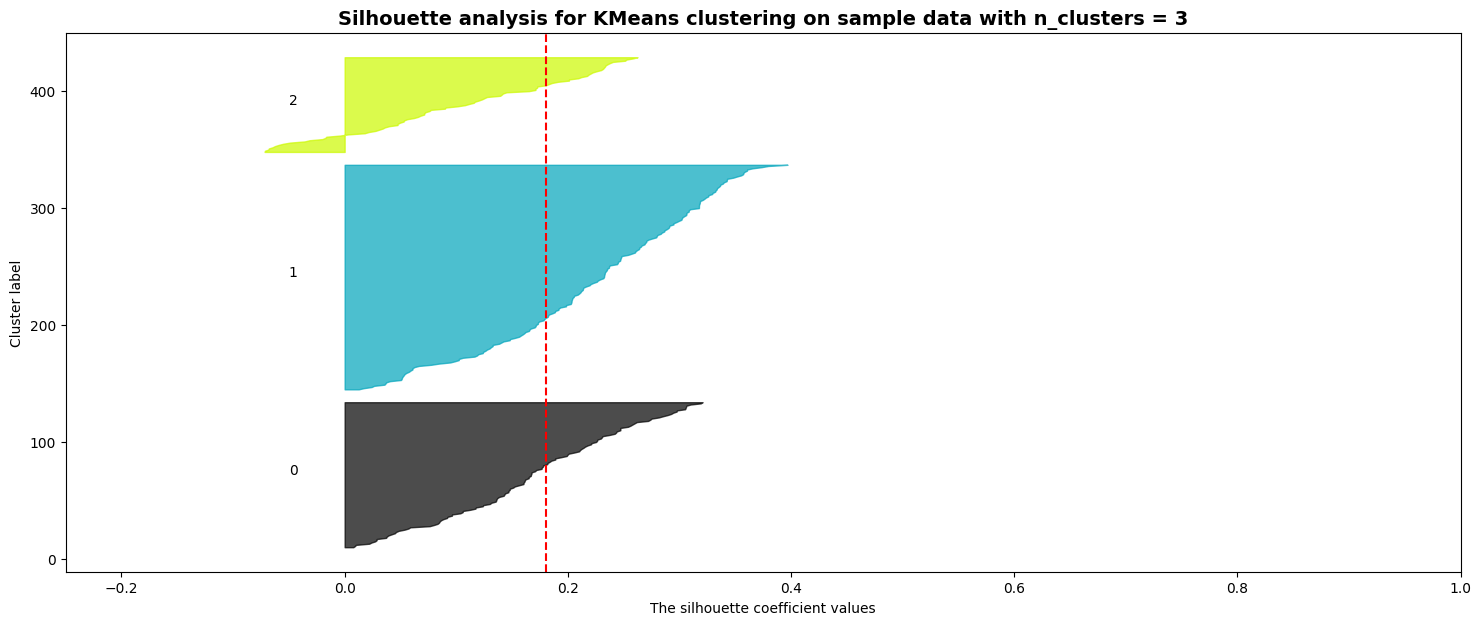

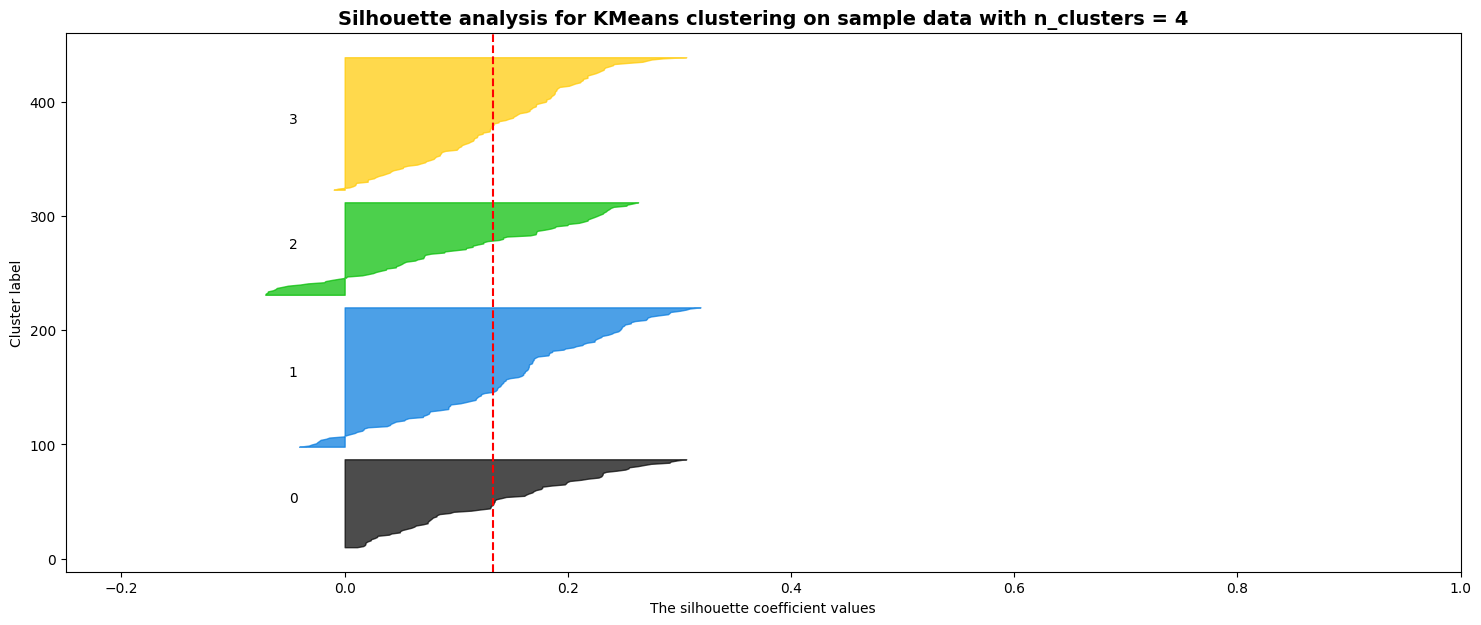

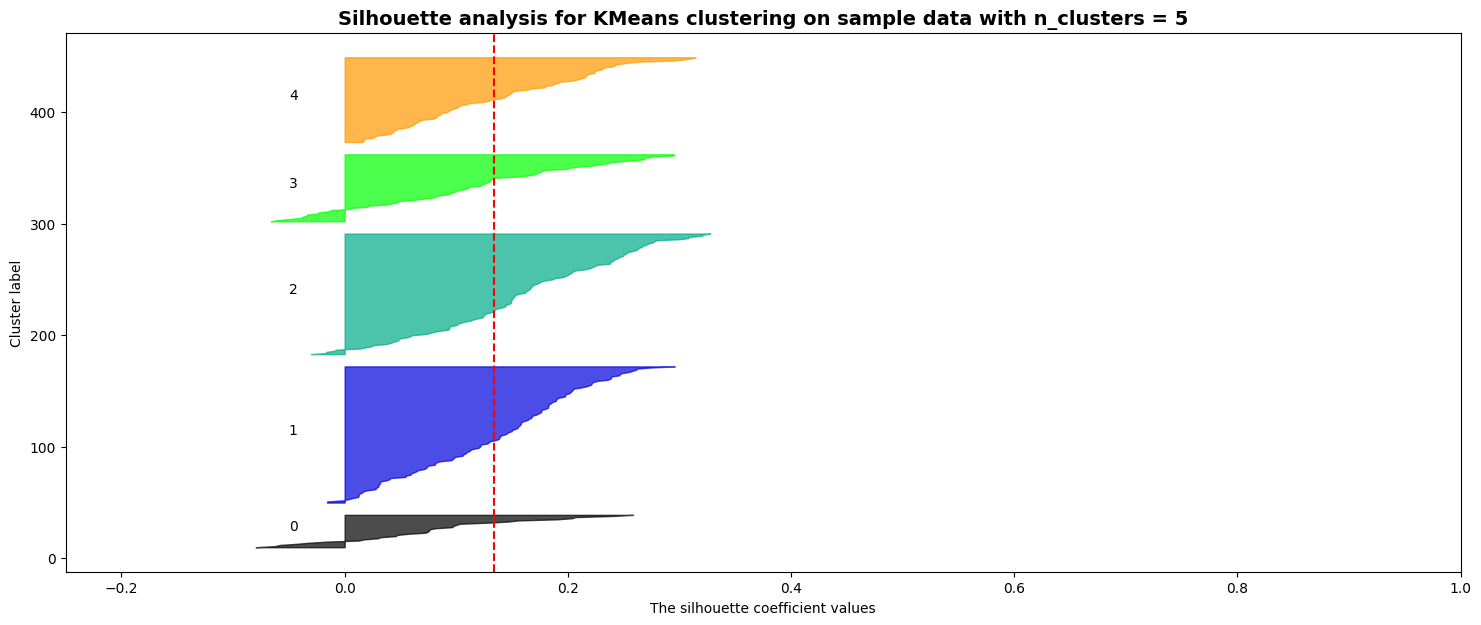

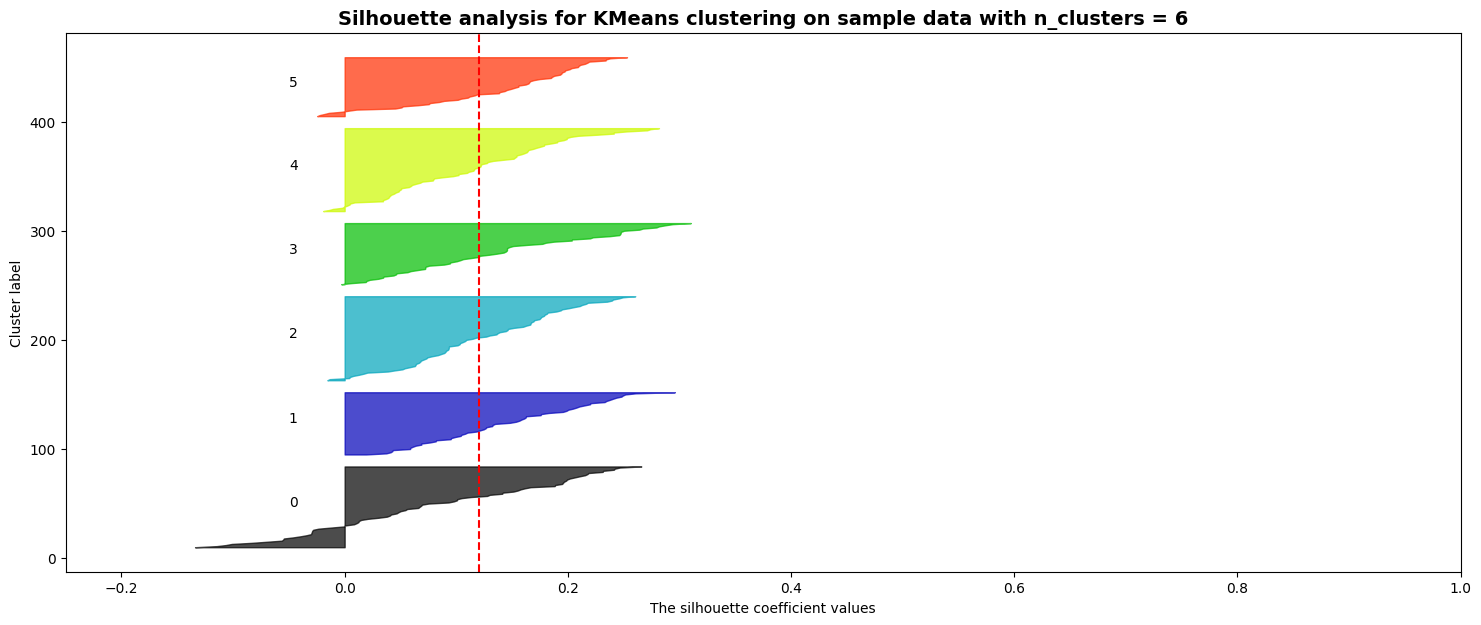

In [25]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=1)
    cluster_labels_km = km.fit_predict(df_test)
    silhouette_avg_km = silhouette_score(df_test, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_test, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


Negative silhouette scores are observed. This suggests that some samples are in the wrong clusters. 

These Silhouette scores are very low, which indicate that the data dimensions are very high, and we can use PCA to reduce the dimensions first. Notice that we cannot include the reponse variable and those categorical variables. So, we have to drop them.

In [26]:
# Check the variance after scaling
df[num_col].var()

age     1.002506
bp      1.002506
bgr     1.002506
bu      1.002506
sod     1.002506
pcv     1.002506
wbcc    1.002506
sc      1.002506
pot     1.002506
hemo    1.002506
rbcc    1.002506
dtype: float64

All variables variance almost equal to 1, profomance is good.

We have to do PCA here.

In [27]:
columns_to_drop = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] 
df_test = df.drop(columns=columns_to_drop)
X = pd.DataFrame(df_test, index=df_test.index, columns=df_test.columns)
X.shape

(400, 11)

In [28]:
from sklearn.decomposition import PCA, TruncatedSVD
pca_X = PCA()

In [29]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), index=X.index)
pc_scores.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.349650,0.183226,0.243718,-0.483879,-0.242939,0.128189,-0.349051,0.480114,-0.217832,-0.063942,-0.296866
1,-1.411052,1.130044,-2.195523,0.472222,0.305535,-2.071453,0.399006,-0.528309,0.366322,0.165107,0.151105
2,1.419362,-0.610541,0.774332,-0.952723,0.336169,-1.066977,0.156837,-0.674355,0.971088,-0.355137,0.063890


In [30]:
pc_scores.var()

0     4.388083
1     1.173689
2     1.086787
3     0.906036
4     0.856147
5     0.777539
6     0.630324
7     0.540595
8     0.352652
9     0.166055
10    0.149662
dtype: float64

use first 3 PC for their eigenvalue > 1

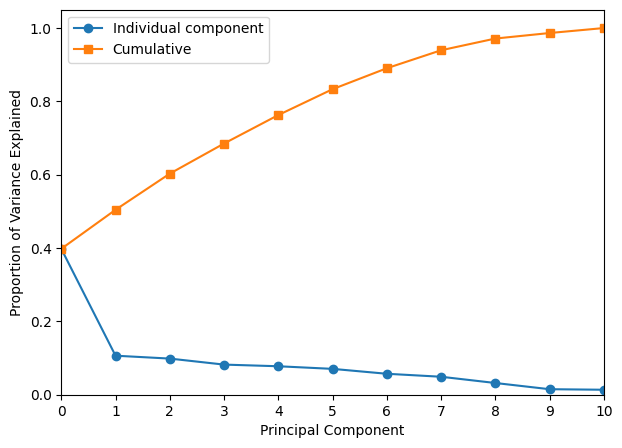

In [31]:
plt.figure(figsize=(7,5))

plt.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(loc=2)

In [32]:
pca = PCA().fit(X)
print(pca_X.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:3])

[0.3979193  0.10643227 0.09855181 0.08216101 0.07763696 0.07050862
 0.05715895 0.04902216 0.03197913 0.01505815 0.01357164]


0.6029033851452663

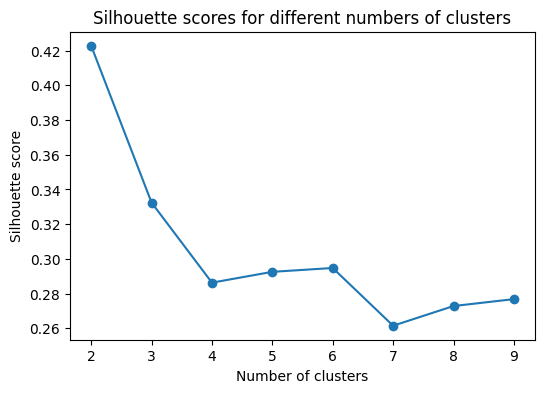

In [33]:
# Perform K—Mean

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_test)

silhouette_scores = []

K_range = range(2, 10)
for K in K_range:
    km = KMeans(n_clusters=K, n_init=20,random_state=1)
    clusters = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, clusters))

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

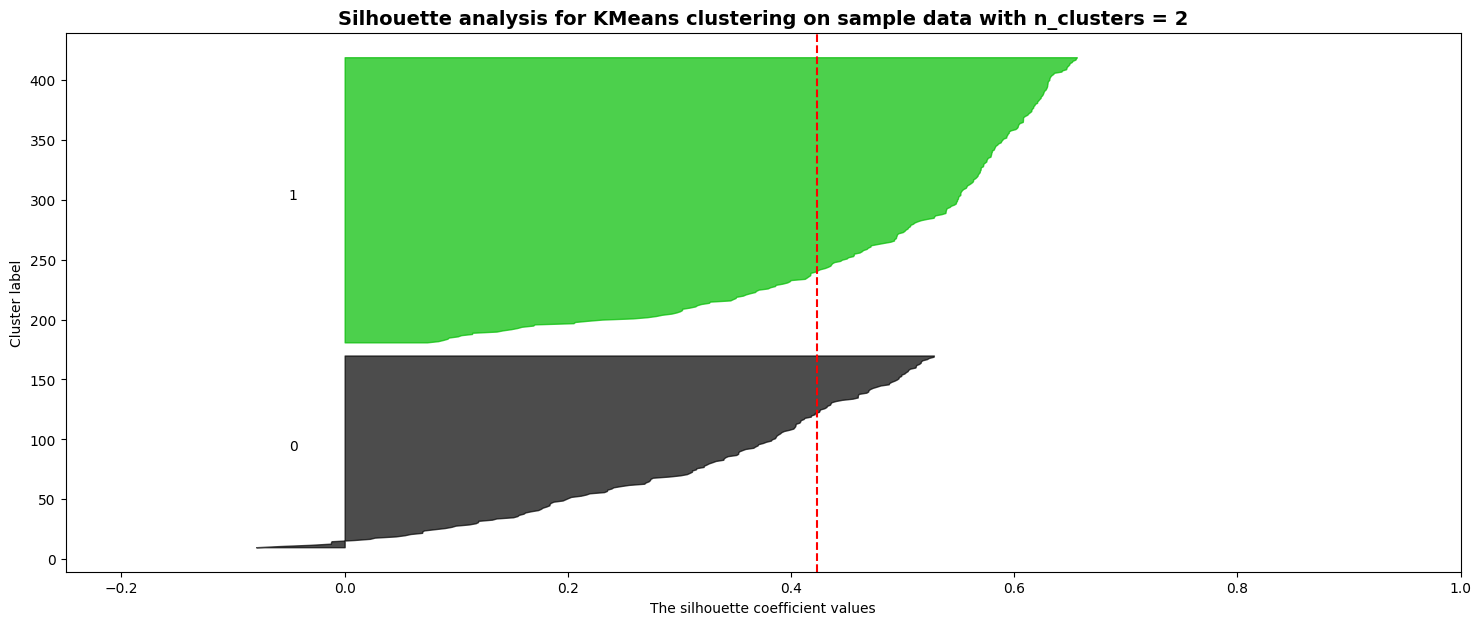

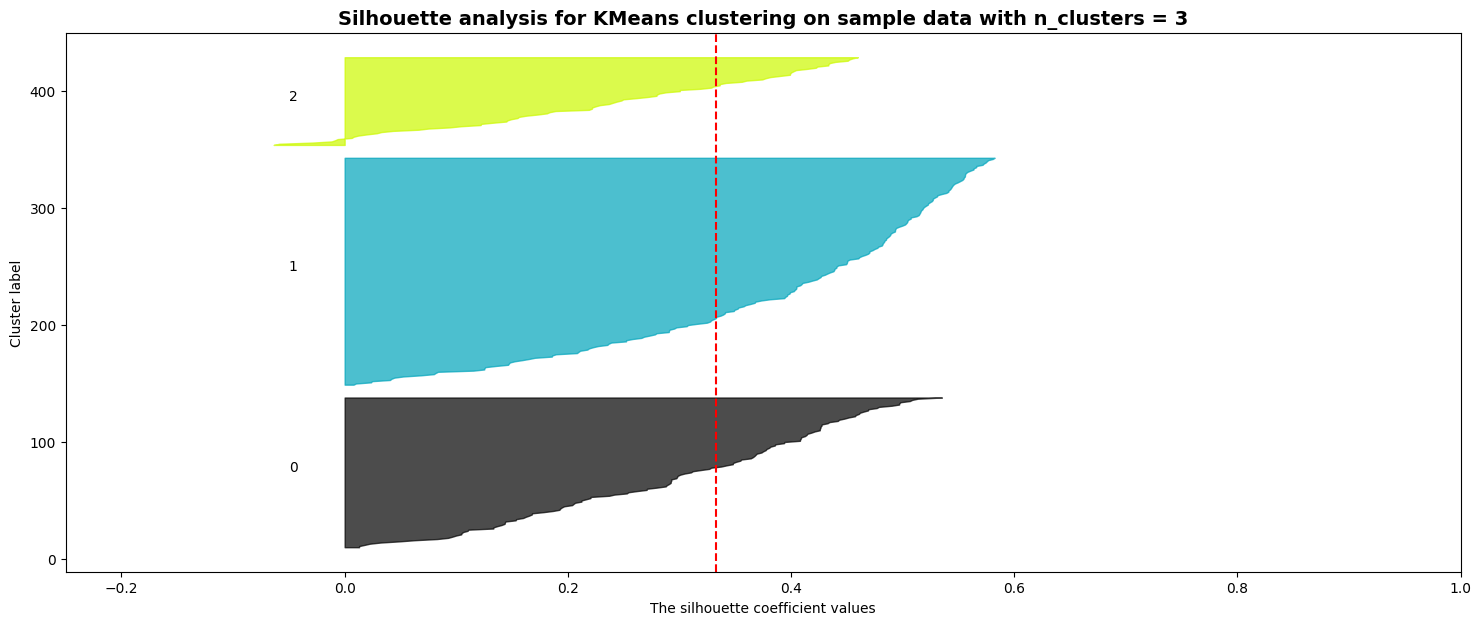

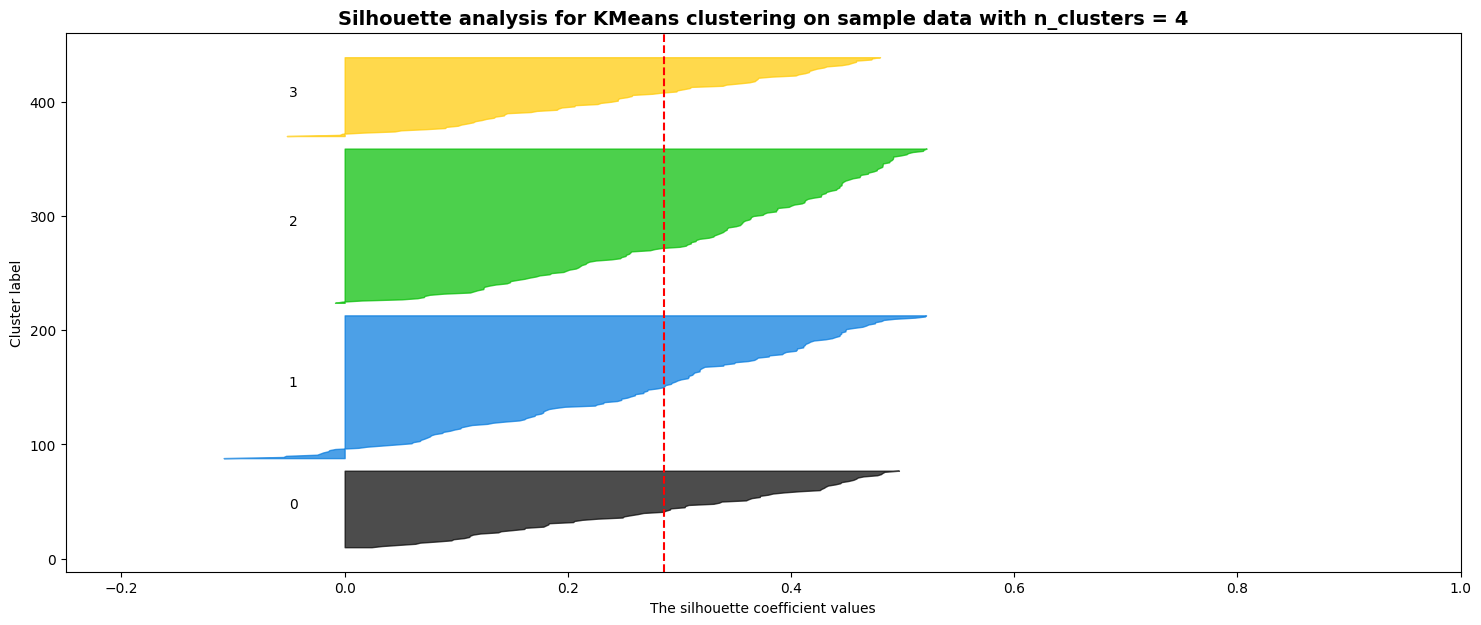

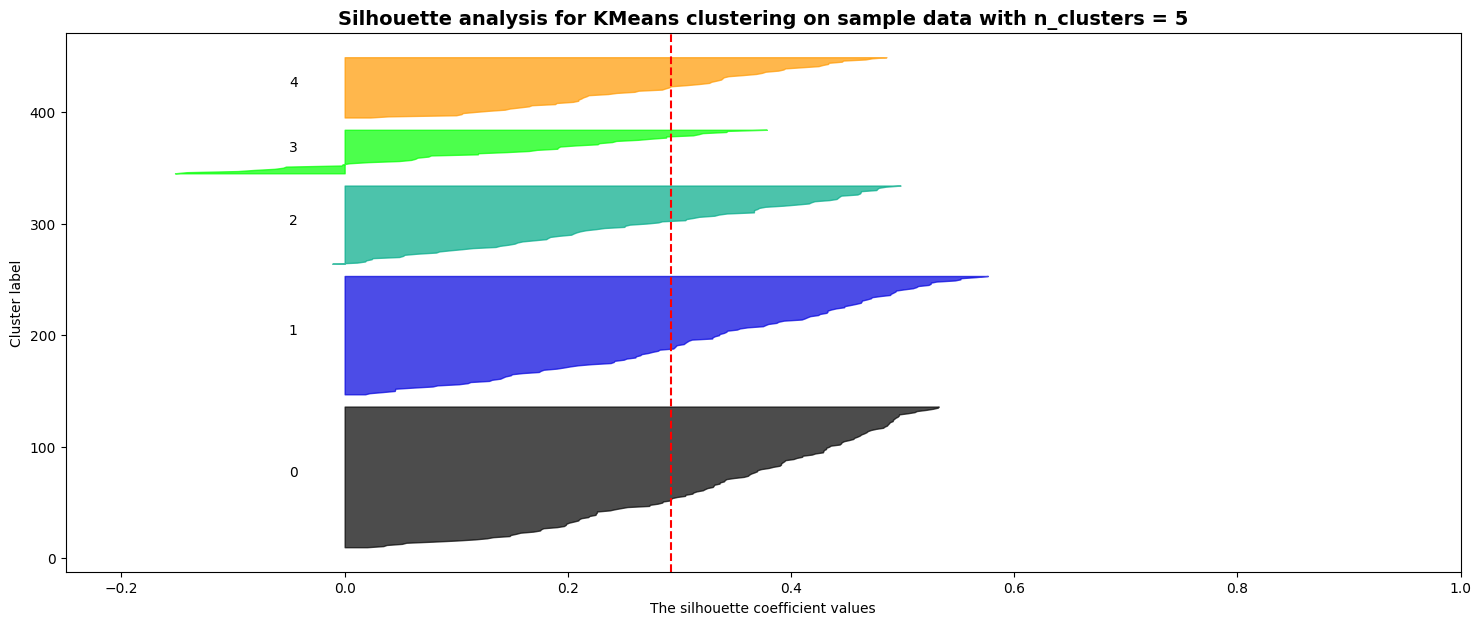

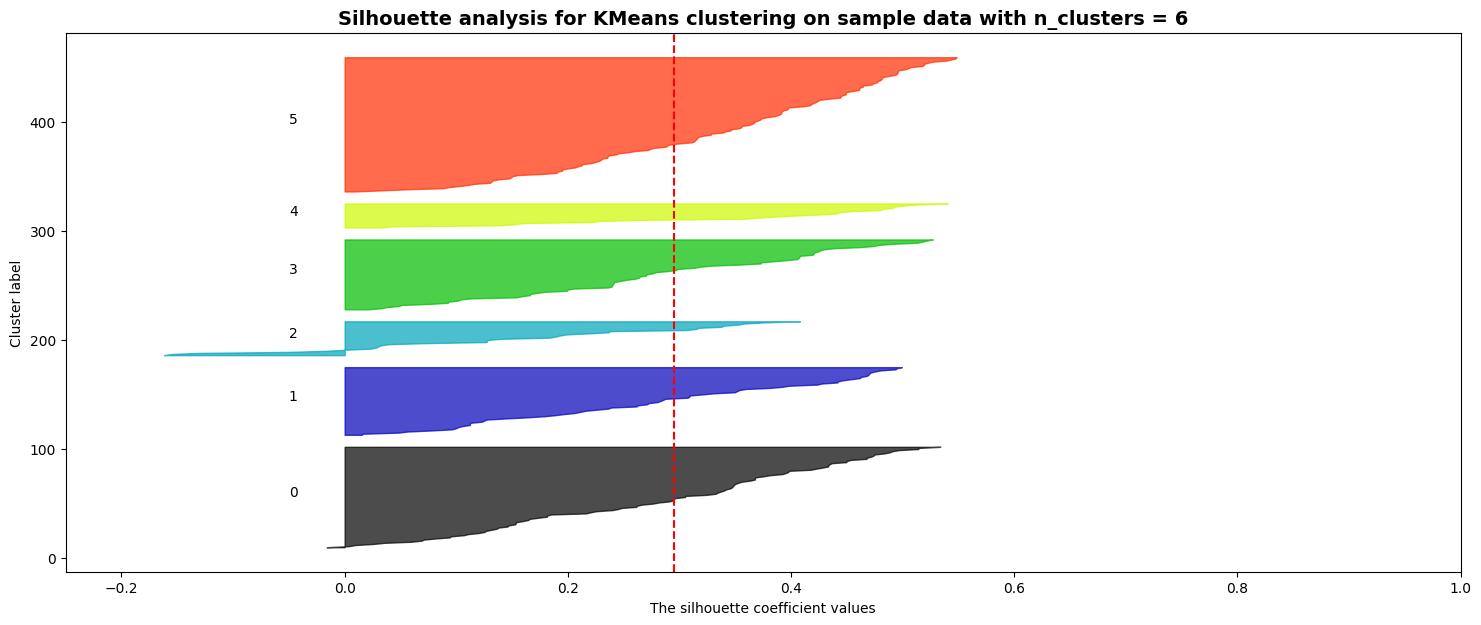

In [34]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_test)

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=1)
    cluster_labels_km = km.fit_predict(df_pca)
    silhouette_avg_km = silhouette_score(df_pca, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


Now K-mean perfroms really good at K=2 after PCA.

Let's use Hierarchical clustering for visualization. 

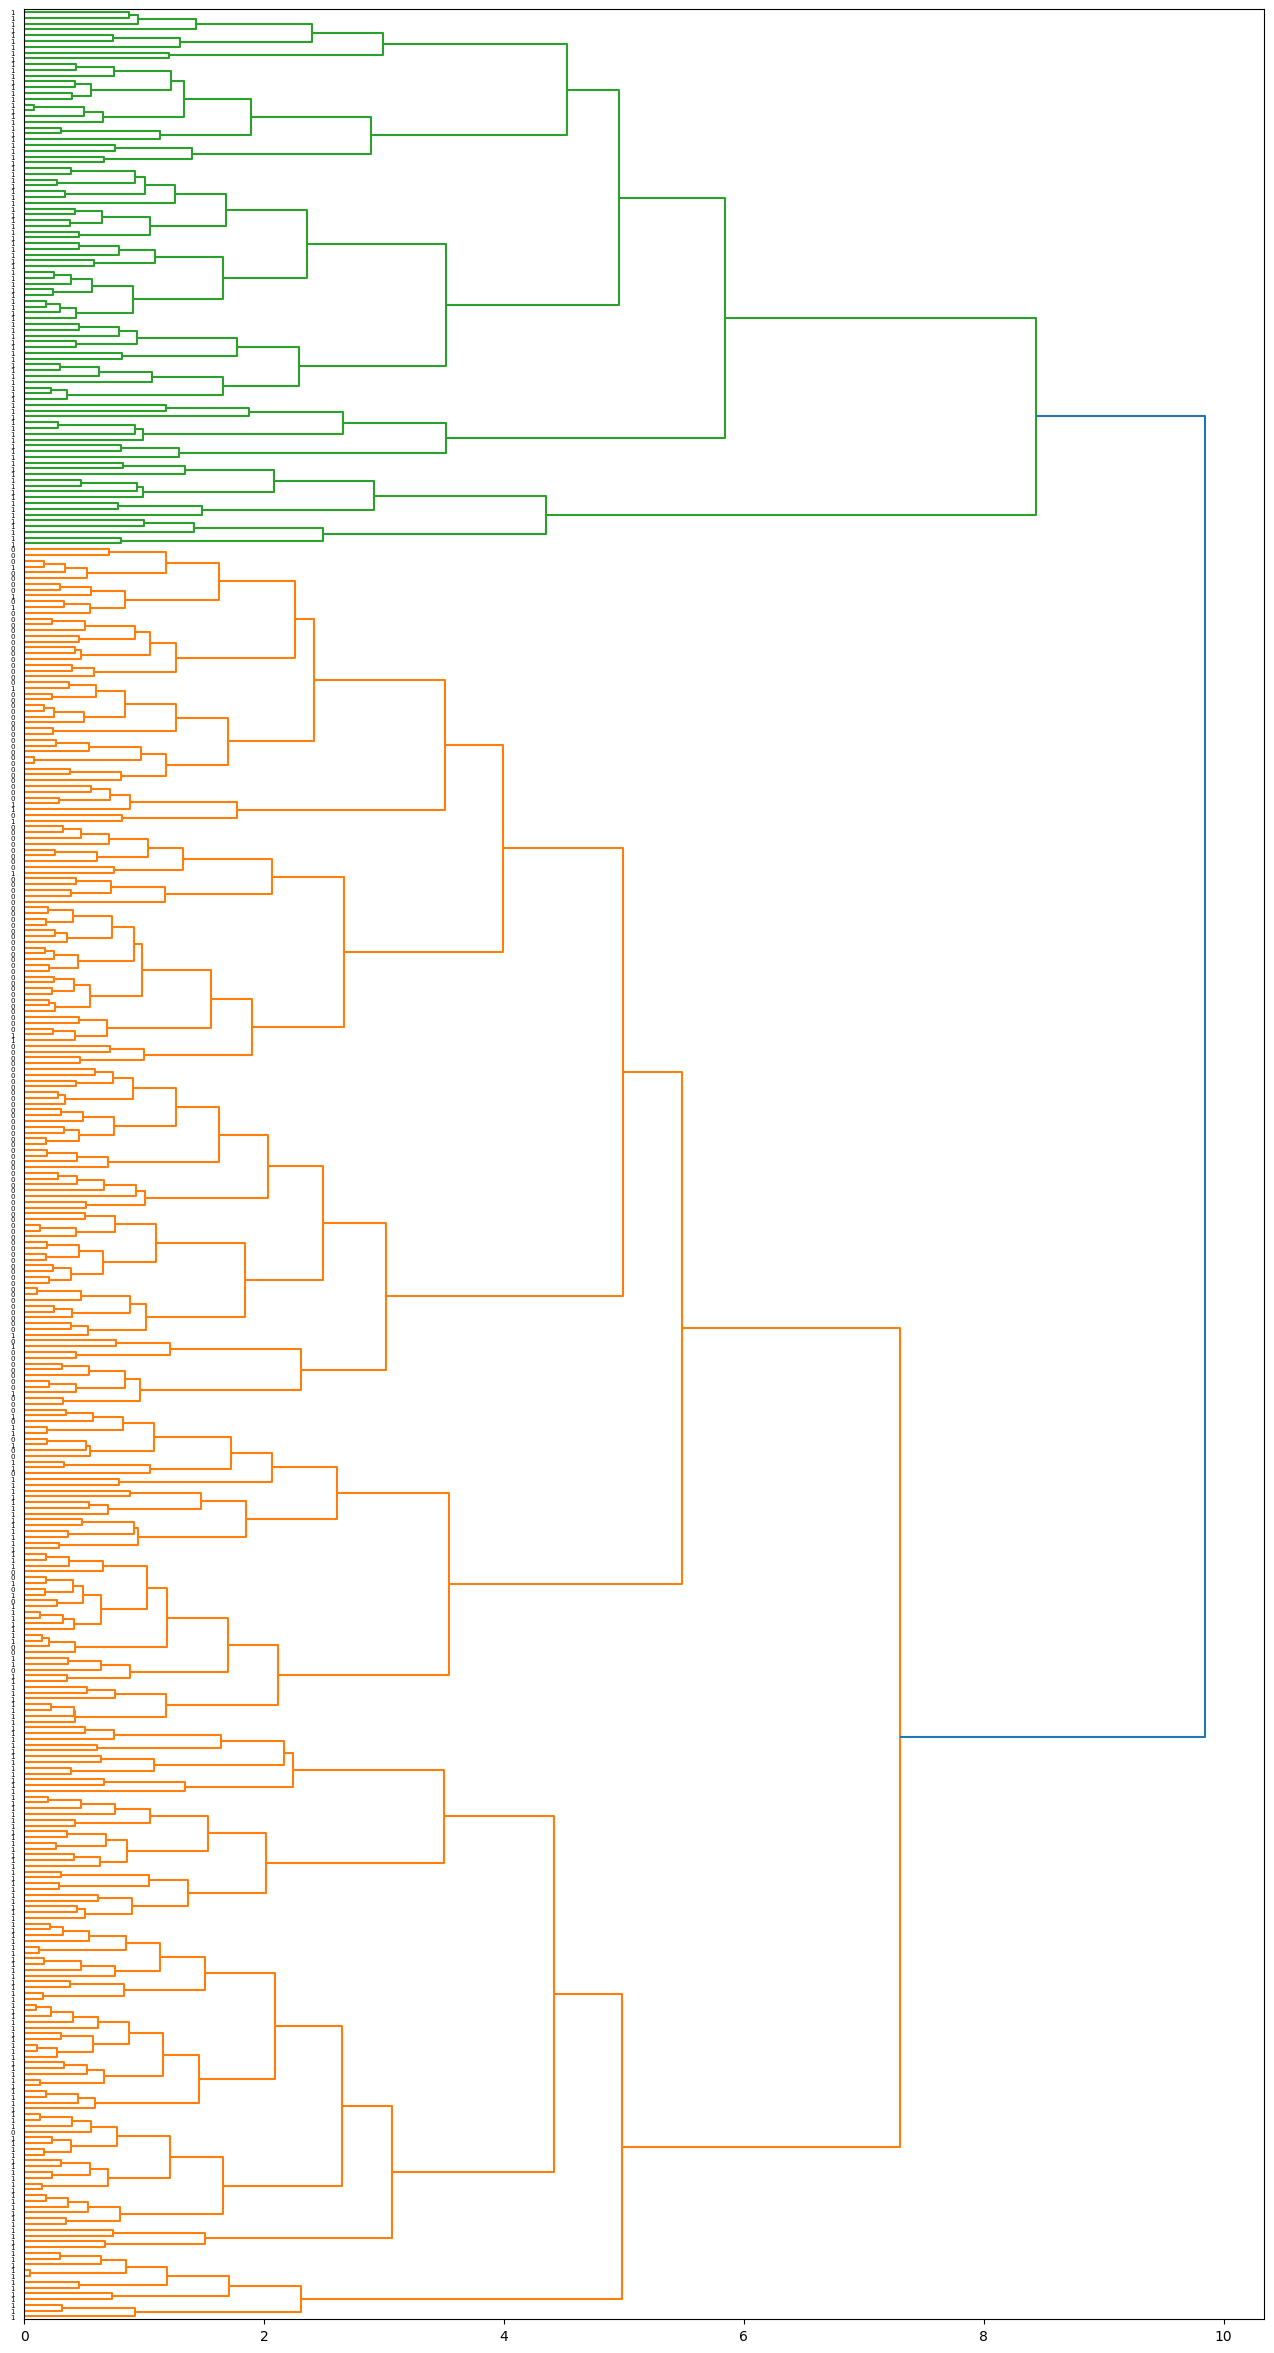

In [35]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score

plt.figure(figsize=(16,30))

pca_cluster = hierarchy.dendrogram(
    hierarchy.complete(df_pca), 
    labels=df['class'].astype(int).astype(str).tolist(), 
    orientation='right', 
    color_threshold=9
)

In [36]:
y = df['class']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: category
Categories (2, float64): [0.0, 1.0]

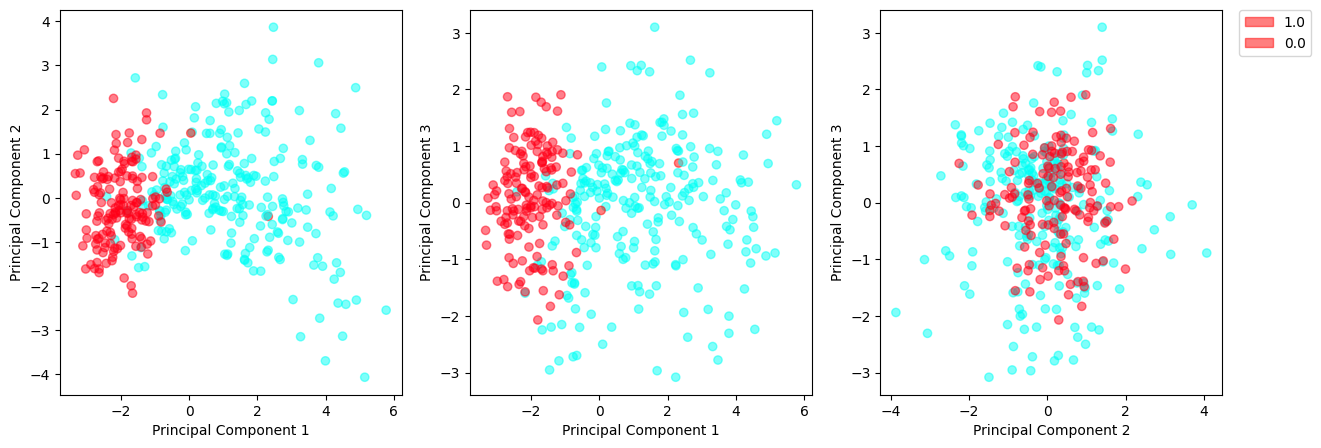

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl

df1 = pd.read_csv(data_url)

df2_plot = pd.DataFrame(pca_X.fit_transform(X))
y = pd.Series(df1['class'])
y_ts = y.map({'ckd': 1, 'notckd': 0})

df_pca_with_target = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

color_idx = pd.factorize(y_ts)[0]
cmap = plt.cm.hsv


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# PC1 vs PC2
axes[0].scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axes[1].scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axes[2].scatter(df2_plot.iloc[:,1], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5)
axes[2].set_xlabel('Principal Component 2')
axes[2].set_ylabel('Principal Component 3')

handles = []
labels = pd.factorize(y_ts.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

axes[2].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This visualization will help illustrate how the clusters are distributed in the reduced-dimensional space.

In [38]:
from sklearn.metrics import adjusted_rand_score

# K = 2
km1 = KMeans(n_clusters=2, n_init=20, random_state=1)
km1.fit(df_pca)

# Status variable saved in (1)
status = df['class'].astype(int).astype(str)

rand_score(km1.labels_, status).round(4)

print('Rand score is ' + str(rand_score(km1.labels_, status).round(4)))



Rand score is 0.6531


Rand score shows that under PCA, k-means has good performance.

### **8. Data Splitting**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_feature = df.drop(columns =['class'])
df_target = df['class']

In [41]:
# 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.3, random_state=1)

### **9. Classifier Choices**

The dataset is about binary classification, and logistic regression performs well on such problems. Therefore, we first choose logistic regression. Secondly, random forest has consistently shown good performance in the field of machine learning and is very popular. So, our Classifier Choices are logistic regression and random forest.

### **10. Performance Metrics**


We will choose 2-3 metrics to predict the effectiveness and accuracy of these two models. We will use Accuracy, Area Under the ROC curve, AUC is usually. Also,we can check the Kolmogorov-Smirnov statistic.


### **11&12. Feature Selection/Extraction and Classifier Comparison**

In these two parts, we will first build the model using two classifiers. Then, we will evaluate our model using the metrics mentioned in Part 10. After that, we will select the appropriate features and then build the model to analyze whether the performance of the model is improved.

#### Classifier I: logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
def_log = LogisticRegression(max_iter = 500)

Train the model on the training set and make predictions on the test set. 

In [44]:
def_log.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [45]:
pred_prob = def_log.predict_proba(X_test)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
df_pro.head(5)

,prob,y_test
398,0.006833,0.0
125,0.998951,1.0
328,0.040847,0.0
339,0.033545,0.0
172,0.999942,1.0


In [46]:
# Create a data frame with predicted probabilities (for default) and the class labels in the test set.
df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [48]:
fpr, tpr, thresholds = roc_curve(df_logit.y_test, df_logit.prob0)

In [49]:
# AUC
roc_auc_score(df_logit.y_test, df_logit.prob0)

0.9954285714285713

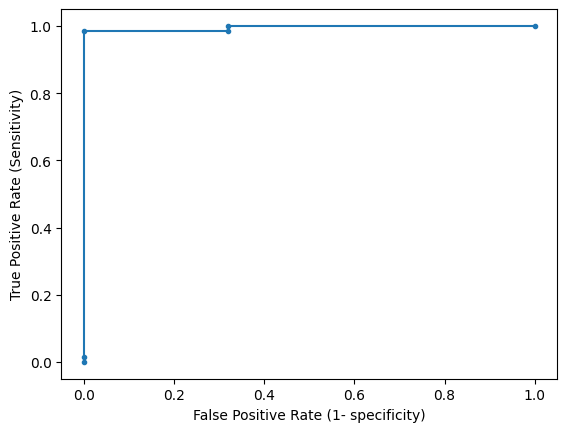

In [50]:
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### ROC Analysis of Binary Classifier (Youden’s J statistic)

In [51]:
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

0.2872090139237359

In [52]:
ind = np.where(np.isclose(thresholds, optimal_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


#### ROC Analysis of Binary Classifier (Kolmogorov–Smirnov statistic)

In [53]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.2872090139237359

In [54]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


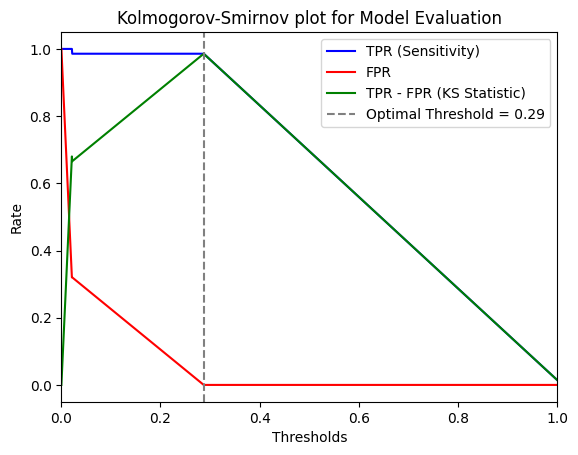

In [55]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
#plt.gca().invert_xaxis() 
plt.show()

The area under the ROC curve (AUC) is around 99.54% indicates that the model has excellent discriminatory power. From the result of Youden’s J statistics and Kolmogorov-Smirnov statistics, the optimal probability cut-off point is at around 0.2878. 

In [56]:
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

choose optimal threshold

In [57]:
# Create a data frame with predicted probabilities (for default) and the class labels in the test set.
df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

# Use cutoff = threshold and compute misclassification error, sensitivity, and specificity.
df_logit['y_test_pred'] = df_logit.prob0.map(lambda x: 1 if x>ks_threshold else 0)



In [58]:
cm = confusion_matrix(df_logit.y_test, df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 2 68]]
Accuracy :  0.9833333333333333


In [59]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

Sensitivity :  0.9714285714285714
Specificity :  1.0


Using all features from the dataset, the ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). The logistic regression model achieves an accuracy of 98.3% at the optimal threshold.

#### Classifier II: Random forest

For random forests, we use grid search to find the optimal values for the number of estimators, maximum depth, and minimum sample split.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Parameter Selection:

In [61]:
#| warning: False

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(0, 200, 20)),
    'max_depth': [None,list(range(1, 20, 5))],
    'min_samples_split': list(range(1, 10, 1))
}

rf = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)


{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 120}


Model training and prediction:

In [62]:
rf = RandomForestClassifier(max_depth=None, min_samples_split=2,n_estimators=160)

In [63]:
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)

Probability of each class predicted by the test set:

In [64]:
pred_prob = rf.predict_proba(X_test)
df_rf = pd.DataFrame(data = {'prob0': pred_prob[:,1], 'y_test': y_test})


In [65]:
fpr, tpr, thresholds = roc_curve(df_rf.y_test, df_rf.prob0)

In [66]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold


0.60625

In [67]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[1.]
[1.]


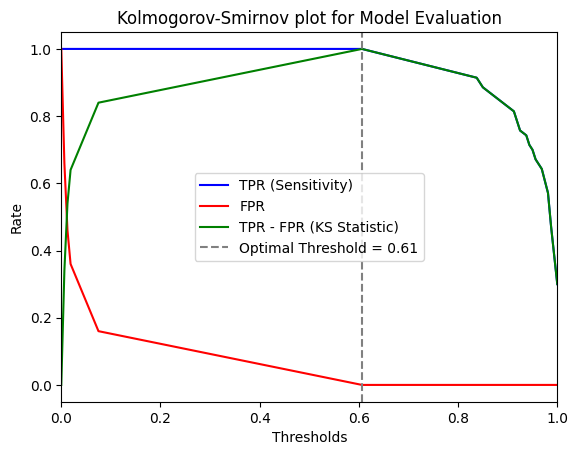

In [68]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
#plt.gca().invert_xaxis() 
plt.show()

In [69]:
# Use cutoff = threshold and compute misclassification error, sensitivity, and specificity.
df_rf['y_test_pred'] = df_rf.prob0.map(lambda x: 1 if x>ks_threshold else 0)

In [70]:
cm = confusion_matrix(df_rf.y_test, df_rf.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = np.trace(cm) / np.sum(cm)
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 1 69]]
Accuracy :  0.9916666666666667


Features Selection:

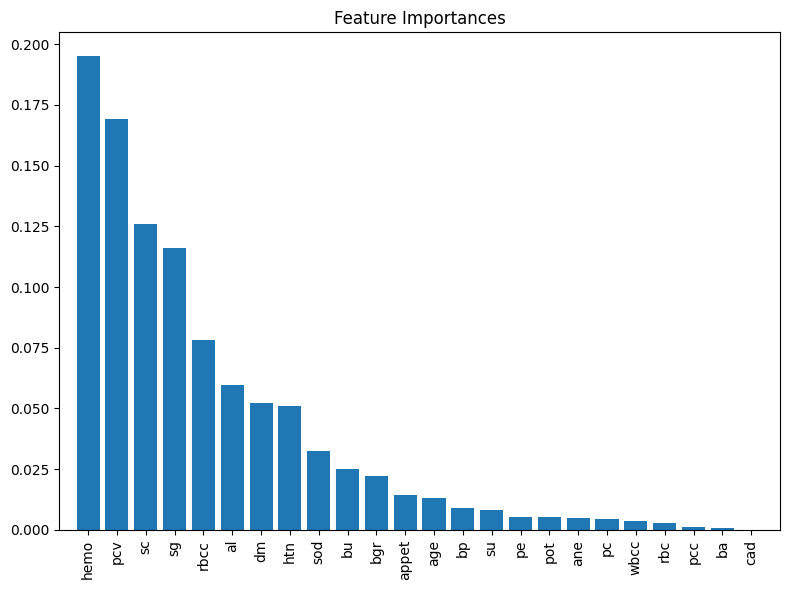

In [71]:
importances = best_rf.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Using all features from the dataset, the ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). The random forest model achieves an accuracy of 99.167% at the optimal threshold.

We can try with Elastic Net

In [72]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [73]:
enet_cv = ElasticNetCV(cv=10, random_state=1)
enet_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, random_state=1)

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
#test MSE associated with this value of $\lambda$ and $l1_ratio$
m_enet =ElasticNet(alpha=enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)
m_enet.fit(X_train, y_train) 
m_enet_pre = m_enet.predict(X_test)
np.sqrt(mean_squared_error(y_test, m_enet_pre))

0.2858361665891256

In [76]:
pd.DataFrame({'Feature': X_train.columns, 'Coefficient': m_enet.coef_.reshape(len(X_train.columns))})

,Feature,Coefficient
0,age,0.010934
1,bp,0.026887
2,sg,-0.000000
3,al,0.054397
4,su,0.005206
5,rbc,0.000000
6,pc,0.000000
7,pcc,0.000000
8,ba,-0.000000
9,bgr,0.034062


Based on the analysis above, [`age`, `bp`, `al`, `su`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, `rbcc`, `htn`, `dm`, `cad`, `appet`, `ane`] are important features.

In [77]:
sel_col = ['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'ane']
X_train_elastic_net = X_train[sel_col]

In [78]:
from sklearn import metrics
X_test_elastic_net = X_test[sel_col]
EN_log = LogisticRegression(max_iter = 500)
EN_log.fit(X_train_elastic_net, y_train)
EN_test = EN_log.predict(X_test_elastic_net)
np.sqrt(metrics.mean_squared_error(y_test, EN_test))

0.18257418583505536

use feature selection to do logistic again 

In [79]:
# use feature selection to do logistic again 
EN_log = LogisticRegression(max_iter = 500)
EN_log.fit(X_train_elastic_net, y_train)
pred_prob = EN_log.predict_proba(X_test_elastic_net)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
EN_df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )
fpr, tpr, thresholds = roc_curve(EN_df_logit.y_test, EN_df_logit.prob0)

In [80]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.3054643741096191

In [81]:
# Use cutoff = 0.3052 and compute misclassification error, sensitivity, and specificity.
EN_df_logit['y_test_pred'] = EN_df_logit.prob0.map(lambda x: 1 if x>0.3052 else 0)

In [82]:
cm = confusion_matrix(EN_df_logit.y_test, EN_df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 1 69]]
Accuracy :  0.9916666666666667


Elastic net successfully achieves shrinkage through feature selection and extraction while  accuracy also increased from 98.3% to 99.2%.

Let's try Sequential Forward Selection for logistic regression

In [83]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [84]:
def_log = LogisticRegression(max_iter = 500)
def_log.fit(X_train, y_train)
d_l_test = def_log.predict(X_test)

In [85]:
np.sqrt(metrics.mean_squared_error(y_test, d_l_test))

0.18257418583505536

In [86]:
df_feature.shape

(400, 24)

In [87]:
sfs = SFS(
    def_log,
    k_features=(1,df_feature.shape[1]),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=10
    )

In [88]:
sfs = sfs.fit(X_train, y_train)

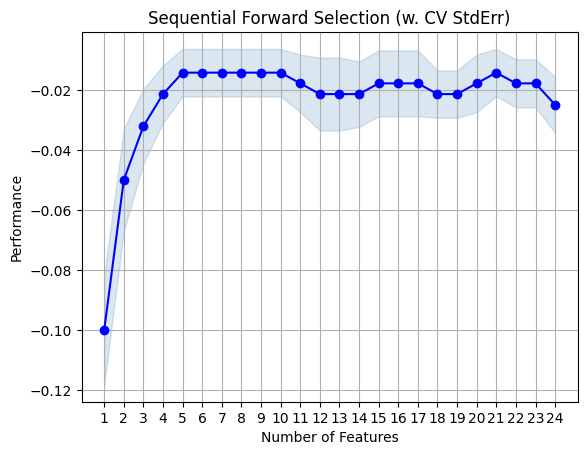

In [89]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [90]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['al', 'su', 'sc', 'pot', 'hemo'], dtype='object')

By feature selection, ['al', 'su', 'sc', 'pot', 'hemo'] are chosen

In [91]:
# Prediction on hold-out set
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_log = LogisticRegression(max_iter = 500)
sfs_log.fit(X_train_sfs, y_train)
sfs_test = sfs_log.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

0.2041241452319315

In [92]:
# use feature selection to do logistic again 
sfs_log = LogisticRegression(max_iter = 500)
sfs_log.fit(X_train_sfs, y_train)
pred_prob = sfs_log.predict_proba(X_test_sfs)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
sfs_df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )
fpr, tpr, thresholds = roc_curve(sfs_df_logit.y_test, sfs_df_logit.prob0)

In [93]:
# AUC
roc_auc_score(sfs_df_logit.y_test, sfs_df_logit.prob0)

0.9925714285714284

In [94]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.42263344889380317

In [95]:

# Use cutoff = 0.287 and compute misclassification error, sensitivity, and specificity.
sfs_df_logit['y_test_pred'] = sfs_df_logit.prob0.map(lambda x: 1 if x>0.4228 else 0)



In [96]:
cm = confusion_matrix(sfs_df_logit.y_test, sfs_df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 5 65]]
Accuracy :  0.9583333333333334


It's evident that the final performance of logistic-based sequential forward selection is not as good as Elastic Net. Therefore, we will choose the results of Elastic Net as Elastic net successfully achieves shrinkage through feature selection and extraction while  accuracy also increased from 98.3% to 99.2%.

sel_col = [`age`, `bp`, `al`, `su`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, `rbcc`, `htn`, `dm`, `cad`, `appet`, `ane`]

For Random Forest, if we choose features from Elastic Net.

In [97]:
#| warning: false

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(0, 200, 20)),
    'max_depth': [None,list(range(0, 20, 5))],
    'min_samples_split': list(range(1, 10, 1))
}


grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_elastic_net, y_train)
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test_elastic_net)


{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 40}


In [98]:
rf = RandomForestClassifier(max_depth=None, min_samples_split=3, n_estimators=160)
rf.fit(X_train_elastic_net,y_train)
pred_prob = rf.predict_proba(X_test_elastic_net)
df_rf = pd.DataFrame(data = {'prob0': pred_prob[:,1], 'y_test': y_test})

In [99]:
fpr, tpr, thresholds = roc_curve(df_rf.y_test, df_rf.prob0)

In [100]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.4114583333333333

In [101]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[0.98]


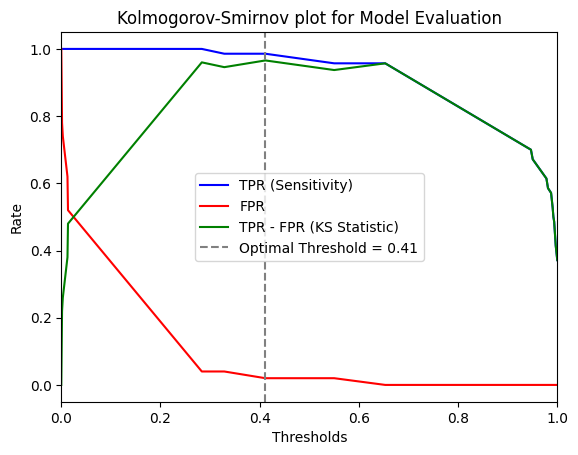

In [102]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
#plt.gca().invert_xaxis() 
plt.show()

In [103]:
# Use cutoff = threshold and compute misclassification error, sensitivity, and specificity.
df_rf['y_test_pred'] = df_rf.prob0.map(lambda x: 1 if x>ks_threshold else 0)

In [104]:
cm = confusion_matrix(df_rf.y_test, df_rf.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[49  1]
 [ 2 68]]
Accuracy :  0.975


By employing Elastic Net feature selection, it appears that random forest does not perform well. Therefore Random forest should use original dataset.

Finding:

Based on ROC-derived optimal thresholds and testing the prediction results of logistic regression and random forest, we found that after elastic net feature selection, logistic regression achieved a superior accuracy of 99.167%.\
Confusion Matrix:\
[50 0]\
[1 69]

The random forest model, utilizing the full feature set, also delivered a similar accuracy with an identical confusion matrix.\
Confusion Matrix:\
[50 0]\
[1 69]

This parallel in performance suggests that both models are performing exceptionally well. However, in keeping with the principle of Occam's razor, the logistic regression model, which maintains high accuracy with a reduced feature set post elastic net regularization, is deemed more efficient and is therefore the preferable model.

We also attempted sequential forward selection based on logistic regression, but the final accuracy was even lower than before selection. This indicates that different feature selection methods are suitable for different datasets, and the appropriate data science method for feature selection should be chosen based on the characteristics of the dataset.

### **13. Interpretable Classifier Insight**

In [105]:
# features from elastic net
sel_col = ['al', 'su', 'sc', 'pot', 'hemo']

In [106]:
# re-training the interpretable classifier with all available data
model = sm.Logit(df_target,df[sel_col]).fit()

         Current function value: 0.113334
         Iterations: 35


In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.8287
Time:                        12:44:36   Log-Likelihood:                -45.334
converged:                      False   LL-Null:                       -264.63
Covariance Type:            nonrobust   LLR p-value:                 1.276e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
al            23.9086   8131.221      0.003      0.998   -1.59e+04     1.6e+04
su            13.8046   1.76e+05   7.84e-05      1.000   -3.45e+05    3.45e+05
sc             1.0387      0.345      3.011      0.003       0.363       1.715
pot           -0.3635      0.371     -0.979      0.328      -1.091       0.364
hemo          -4.5635      0.844     -5.405      0.000      -6.218      -2.909
==============================================================================

Possibly complete quasi-separation: A fraction 0.44 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

`al` and `su` have really large coefficients, but their p-values are high, close to 1, indicating unreliable coefficient estimates possibly due to fitting issues. 

The coefficient of `sc` is positive and p-value is really small, indicating a significant effect on the classification outcome while controlling for other variables. serum creatinine level could be an important predictor with a high correlation to the classification of kidney disease.

The coefficient of `hemo` is negative p-value is really small, indicating a significant effect on the classification outcome while controlling for other variables. hemoglobin could be an important predictor with a high negative correlation to the classification of kidney disease.

### **14. [Bonus] Sub-group Improvement Strategy**

For sub-group analysis we did in previous part, K=2 proforms well. We want to apply logistic regression, but this solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0.

Therefore we try random forest here.

In [108]:
pca = PCA(n_components = 3)
# K = 2
km1 = KMeans(n_clusters=2, n_init=20, random_state=1)
km1.fit(df_pca)

KMeans(n_clusters=2, n_init=20, random_state=1)

In [109]:
# add K=2 cluster labels to df
df['cluster'] = km1.labels_

# seperate cluster
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

In [110]:
from sklearn.ensemble import RandomForestClassifier

# rf train each cluster
rf_cluster_0 = RandomForestClassifier()
rf_cluster_1 = RandomForestClassifier()

# split
X_cluster_0 = cluster_0.drop(['class', 'cluster'], axis=1)
y_cluster_0 = cluster_0['class']
X_cluster_1 = cluster_1.drop(['class', 'cluster'], axis=1)
y_cluster_1 = cluster_1['class']

# train model
rf_cluster_0.fit(X_cluster_0, y_cluster_0)
rf_cluster_1.fit(X_cluster_1, y_cluster_1)


RandomForestClassifier()

In [111]:
from sklearn.metrics import accuracy_score

# calculate accuracy
y_test_pred_cluster_0 = rf_cluster_0.predict(X_test)
accuracy_cluster_0 = accuracy_score(y_test, y_test_pred_cluster_0)

y_test_pred_cluster_1 = rf_cluster_1.predict(X_test)
accuracy_cluster_1 = accuracy_score(y_test, y_test_pred_cluster_1)

print("Accuracy for Cluster 0:", accuracy_cluster_0)
print("Accuracy for Cluster 1:", accuracy_cluster_1)


Accuracy for Cluster 0: 0.5833333333333334
Accuracy for Cluster 1: 1.0


We found that after performing PCA on the dataset and conducting subgroup analysis using K-means with K=2, cluster 01 exhibited excellent performance in random forest, achieving a prediction accuracy of 100%. This suggests that PCA and clustering techniques may improve the performance of one classifier.

### **15. Team Contributions**

Lingyun Huang: P.1: read dataset from repository_url | P.2: Categorical variables transformation | P.4 heatmap, added VIF | P5: missing value | P.6:outlier, handling outliers and plotting | P.7: PCA, PCA plot, add PCA loading, K-mean plot, Hierarchical clustering for visualization, Rand score | P.8: Data Splitting | P.9: text | P.10: add confusion matrix+sensitivity+specificity, ROC, logistic regression, grid search+RF | P. 11: feature selection+Elastic Net+SFS | P.12 text Classifier Comparison | P.13 interpret the significance of predictor variables | P.14: sub group analysis+P14Sub-group Improvement Strategy

Xiangdong Wang: 1. Identified the classification problem. 2. Conducted Variable transformations. 3. Analyzed data overview (according to distribution). 4. Analyzed correlation matrix. 5. Processed missing values. 6. Discussed potential data science methods for finding subgroups. Examples include Hierarchical clustering and K-Mean. Implemented K-Mean and PCA in Subgroup Analysis and visualized the result of K-mean. 7. Discussed the classifier options 8. Analyzed Random Forest in Classifier Comparison

Jingyang Li: 




### **16. Link to the public GitHub repository**

https://github.com/Barkesty/Project-Chronic-Kidney-Disease-Classification-Challenge.git